# Formulating the ideas and getting the data

- OIGA DESMUNZAR POR REGION! Y ENTRAS A ANALIZAR LAS DOS MAYORES REGIONES
- Ranking las 30 más portwfolio weight
- IGUAL POR INDUSTRY! vamos  a analizar por industria las dos industrias

Luego al final la ESG, que pues 
Could be like: 
Analyze the voting on Sustainability reasons of the 5 biggest in Europe and 5 biggest in USA on meetings this year so far. Analyze the ESG of those. And also the performance related decisions

Are the companie's top investments differing a lot from the Fund's voting criteria, specially the ESG?

haz gráficos generales de distribución primero

2.agrupas por sectores, 

- OIGA DESMUNZAR POR REGION! Y ENTRAS A ANALIZAR LAS DOS MAYORES REGIONES
- IGUAL POR INDUSTRY!
quitando estados unidos, cómo es la distribución?
Luego, le preguntas al chat cómo hacer de esto algo sobre ESG

The data as of 30/06/2025

# Objectives of the exploration
1. Find which sector concentrated the majority of the investments of the fund in relative and total terms as of 30/06/2025
2. Find the top 30 companies with the highest Vote % in total
3. Top 10 Highest market value per industry &  per region
4. Top 10 tech companies the fund has more money invested in tech in Europe and the US
4. Check the decisions 


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
print(os.getcwd())


c:\Users\Jose Fernando Barros\the_fund


In [35]:
df= pd.read_excel('EQ_2024_Industry.xlsx')


#  Cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Industry               8659 non-null   object 
 1   Region                 8659 non-null   object 
 2   Country                8659 non-null   object 
 3   Name                   8659 non-null   object 
 4   Market Value(NOK)      8659 non-null   int64  
 5   Market Value(USD)      8659 non-null   int64  
 6   Voting                 8313 non-null   float64
 7   Ownership              8659 non-null   float64
 8   Incorporation Country  8659 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 609.0+ KB


In [37]:
df.head(3)

,Industry,Region,Country,Name,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country
0,Basic Materials,Asia,India,Aarti Industries Ltd,93873366,8265429,0.48,0.48,India
1,Basic Materials,Europe,Lithuania,AB Grigeo,28461548,2506003,1.75,1.75,Lithuania
2,Basic Materials,Europe,Spain,Acerinox SA,502249400,44222411,1.81,1.81,Spain


In [38]:
df.isna().sum()

Industry                   0
Region                     0
Country                    0
Name                       0
Market Value(NOK)          0
Market Value(USD)          0
Voting                   346
Ownership                  0
Incorporation Country      0
dtype: int64

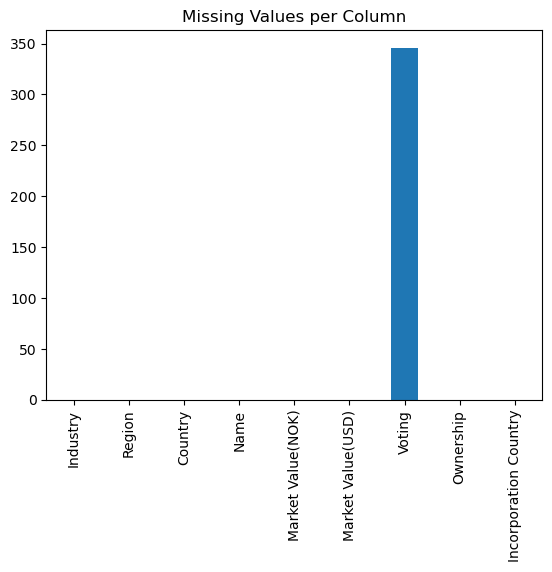

In [39]:
df.isna().sum().plot(kind='bar')
plt.title('Missing Values per Column')
plt.show()

In [40]:
#Understanding how many null values are in the 'Voting' column and how significative they are
null_voting = df['Voting'].isnull().sum()
total_values = len(df)
percentage_null_voting = (null_voting / total_values) * 100
print(f"Percentage of null values in 'Voting' column: {percentage_null_voting:.2f}%")


Percentage of null values in 'Voting' column: 4.00%


**Handling the missing values in the Voting column**

We decided to replace the missing values in the Voting column with the overall mean of the variable. This approach allows us to retain all financial records while maintaining a consistent reference for voting power across the dataset.

Although sector- or region-specific averages could have been computed, doing so would introduce structural bias, as voting rights are determined case by case, depending both on the Fund's investment decisions and on the rights each company’s holdings grant to shareholders, rather than on general industry or regional patterns. Using the global mean thus provides a neutral imputation method that preserves the dataset’s integrity and avoids distorting the overall relationship between Voting and Ownership.

In [41]:
# The original dataframe is preserved for reference.
df_cleaned = df.copy()

In [42]:
mean_value = df_cleaned['Voting'].mean()
df_cleaned['Voting'] = df_cleaned['Voting'].fillna(value=mean_value)

In [43]:
# Verifying that no missing values remain after imputation.
df_cleaned.isna().any()

Industry                 False
Region                   False
Country                  False
Name                     False
Market Value(NOK)        False
Market Value(USD)        False
Voting                   False
Ownership                False
Incorporation Country    False
dtype: bool

**Dropping 'Incorporation Country**

The `Incorporation Country` column is removed as it is not relevant to our analysis.  
It mainly reflects legal registration details, whereas our focus is on operational and financial data.  
Eliminating this column helps streamline the dataset without losing analytical value.


In [44]:
df_cleaned = df_cleaned.drop(columns= ['Incorporation Country'])

In [45]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market Value(NOK),Market Value(USD),Voting,Ownership
0,Basic Materials,Asia,India,Aarti Industries Ltd,93873366,8265429,0.48,0.48
1,Basic Materials,Europe,Lithuania,AB Grigeo,28461548,2506003,1.75,1.75


In [46]:
#The Market value in NOK, the norwegian currency, will be dropped since it is not relevant for the analysis
df_cleaned = df_cleaned.drop(columns= ['Market Value(NOK)'])

In [47]:
#A cleaner format for a column name
df_cleaned.rename(columns={
    "Market Value(USD)": "Market_Value_USD",
}, inplace=True)


In [48]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          8659 non-null   object 
 1   Region            8659 non-null   object 
 2   Country           8659 non-null   object 
 3   Name              8659 non-null   object 
 4   Market_Value_USD  8659 non-null   int64  
 5   Voting            8659 non-null   float64
 6   Ownership         8659 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 473.7+ KB


The Market Value column shows the value of the fund’s investment in each company, i.e., the total value of the equity stake the fund holds.

In [49]:
#The printed value matches the value shown by the fund's official website
total_value = df_cleaned['Market_Value_USD'].sum()    
print(f'The total market value of the fund in EQUITIES only is: ${total_value:,.2f}')

The total market value of the fund in EQUITIES only is: $1,285,843,040,083.00


The computed value aligns exactly with the figure reported on the fund’s official website for equity holdings in 2024.  
This validates the correctness of our calculations and confirms the consistency of our analysis methodology.  
Reference: [NBIM – All Investments 2024](https://www.nbim.no/en/investments/all-investments/#/2024)


**Creating the Portfolio_Weight Column**

The `Market Value` column reflects the absolute investment value of the fund in each company.  

To better understand the relative importance of each holding, we decided to create a new column: `Portfolio_Weight`, which represents the proportion of the fund's total investments accounted for by each company. 

This allows us to analyze the fund's allocation both in absolute and relative terms.


In [50]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75


In [51]:
df_cleaned['Portfolio_Weight'] = df_cleaned['Market_Value_USD'] / total_value *100

In [52]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195


In [53]:
#Checking the dataframe after adding the Portfolio_Weight column
df_cleaned.sort_values(by='Portfolio_Weight', ascending=False)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
7186,Technology,North America,United States,Apple Inc,46210392003,1.220000,1.22,3.593782
7724,Technology,North America,United States,Microsoft Corp,43758827987,1.400000,1.40,3.403124
7794,Technology,North America,United States,NVIDIA Corp,42973911250,1.310000,1.31,3.342081
7160,Technology,North America,United States,Alphabet Inc,29271691564,0.880000,1.26,2.276459
679,Consumer Discretionary,North America,United States,Amazon.com Inc,26979313029,1.170000,1.17,2.098181
...,...,...,...,...,...,...,...,...
3025,Financials,Asia,Indonesia,Bank Neo Commerce Tbk PT,0,1.059142,0.00,0.000000
1114,Consumer Discretionary,Africa,Egypt,GB Corp/EG,0,1.059142,0.00,0.000000
8597,Utilities,Europe,Russia,RusHydro PJSC,0,1.059142,0.00,0.000000
2297,Consumer Staples,Asia,Thailand,GFPT PCL,0,1.059142,0.00,0.000000


In [54]:
# Portfolio weight should sum to 100%
df_cleaned['Portfolio_Weight'].sum()

99.99999999999999

In [55]:
df_cleaned[df_cleaned['Market_Value_USD'] == 0]

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
765,Consumer Discretionary,Asia,Thailand,BEC World PCL,0,1.059142,0.00,0.0
1114,Consumer Discretionary,Africa,Egypt,GB Corp/EG,0,1.059142,0.00,0.0
1475,Consumer Discretionary,Africa,Egypt,MM Group for Industry & International Trade SAE,0,1.059142,0.00,0.0
2297,Consumer Staples,Asia,Thailand,GFPT PCL,0,1.059142,0.00,0.0
2801,Energy,Europe,United Kingdom,Petrofac Ltd,0,1.059142,0.00,0.0
3025,Financials,Asia,Indonesia,Bank Neo Commerce Tbk PT,0,1.059142,0.00,0.0
4393,Health Care,Europe,Germany,Marseille-Kliniken AG,0,1.059142,0.00,0.0
4542,Health Care,Asia,South Korea,R Bio Co Ltd,0,0.450000,0.45,0.0
6754,Real Estate,Europe,United Kingdom,Home Reit PLC,0,1.059142,0.00,0.0
6849,Real Estate,Asia,Thailand,LPN Development PCL,0,1.059142,0.00,0.0


In [56]:
df_cleaned[df_cleaned['Market_Value_USD'] == 0].shape

(14, 8)

There are 14 companies in the dataset with `Market_Value_USD` equal to 0.  
This can occur because the fund may have voted on these companies or held them previously, but at the snapshot date of the portfolio, there was no actual market value reported.  
For the purpose of this analysis, these entries will be removed.  
Excluding them helps clean the dataset and ensures that our analysis focuses only on holdings that contribute economically to the portfolio.
<!--  -->

In [57]:
print(df_cleaned.shape)
df_cleaned = df_cleaned[df_cleaned['Market_Value_USD'] > 0]
df_cleaned.shape #Checking the shape after removing rows with 0 market value. Must be 14 rows less.

(8659, 8)


(8645, 8)

In [58]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195


In [59]:
#Last cleaning step: re-checking if there are any null values
df_cleaned.isnull().sum()

Industry            0
Region              0
Country             0
Name                0
Market_Value_USD    0
Voting              0
Ownership           0
Portfolio_Weight    0
dtype: int64

In [60]:
# Giving another name to the dataframe for clarity and scalability.
# We use the date of the data (2024) as a reference to make it explicit which snapshot we are analyzing.
# Creating a separate copy ensures that further data cleaning, filtering, or transformations
# can be applied without affecting the previous dataframe, improving reproducibility and traceability.
fund_2024 = df_cleaned.copy()


In [61]:
fund_2024.head()

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195
2,Basic Materials,Europe,Spain,Acerinox SA,44222411,1.81,1.81,0.003439
3,Basic Materials,Asia,Japan,Achilles Corp,346429,0.26,0.26,0.000027
4,Basic Materials,North America,Canada,Aclara Resources Inc,93266,0.18,0.18,0.000007


In [62]:
fund_2024.tail()

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
8654,Utilities,Asia,China,Xinyi Energy Holdings Ltd,344,1.059142,0.00,2.675288e-08
8655,Utilities,Asia,Malaysia,YTL Corp Bhd,64203424,0.970000,0.97,4.993100e-03
8656,Utilities,Asia,Malaysia,YTL Power International Bhd,58886955,0.730000,0.73,4.579638e-03
8657,Utilities,Europe,United Kingdom,Yu Group plc,3520023,0.930000,0.93,2.737522e-04
8658,Utilities,Asia,China,Zhongyu Energy Holdings Ltd,85142,0.010000,0.01,6.621492e-06


# First Objective

1) Identify the sector that holds the largest share of the fund's total investments at the end of 2024  
2) Examine the sector distribution in relative terms to understand the portfolio's composition.


In [213]:
fund_2024.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195


In [214]:
fund_2024.groupby('Industry')['Market_Value_USD'].sum().sort_values(ascending=False)

Industry
Technology                347235729038
Financials                197686814418
Consumer Discretionary    183400008738
Industrials               162667017609
Health Care               126313700993
Real Estate                62811616191
Consumer Staples           59309363538
Energy                     40401420663
Basic Materials            39521759400
Telecommunications         36805564927
Utilities                  29690044568
Name: Market_Value_USD, dtype: int64

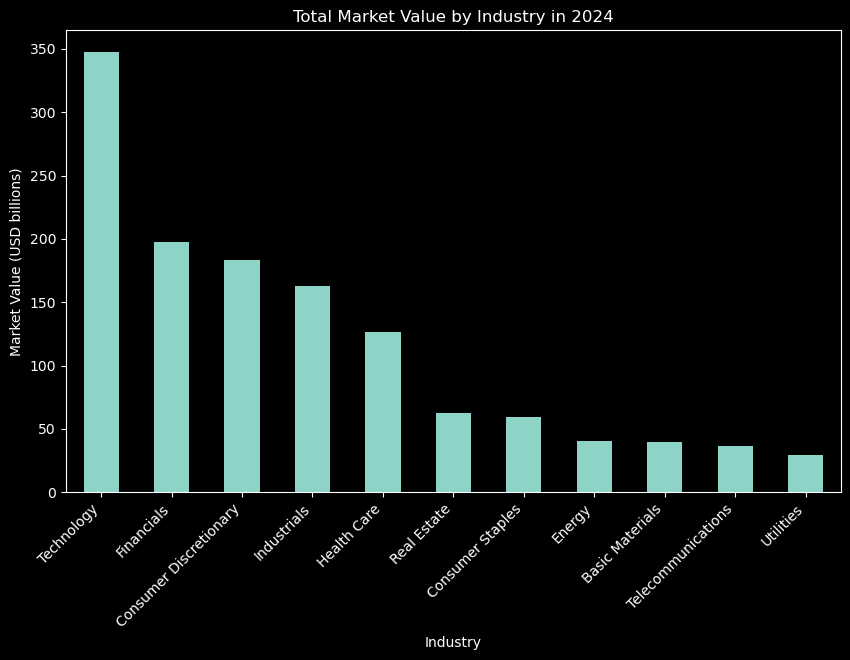

In [220]:
# Convert Market Value to billions USD
market_by_industry = fund_2024.groupby('Industry')['Market_Value_USD'].sum() / 1e9

# Plot
market_by_industry.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Total Market Value by Industry in 2024')
plt.ylabel('Market Value (USD billions)')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.show()


Having identified Technology as the industry with the highest total investment in the fund, I now examine the distribution in relative terms to assess the proportional weight of each sector within the portfolio.


In [219]:
industry_market_value = fund_2024.groupby('Industry')['Market_Value_USD'].sum()
industry_market_value_percentage = (industry_market_value / industry_market_value.sum()) * 100
industry_market_value_percentage.sort_values(ascending=False)

Industry
Technology                27.004519
Financials                15.374102
Consumer Discretionary    14.263017
Industrials               12.650612
Health Care                9.823415
Real Estate                4.884859
Consumer Staples           4.612489
Energy                     3.142018
Basic Materials            3.073607
Telecommunications         2.862368
Utilities                  2.308994
Name: Market_Value_USD, dtype: float64

Investments in the technology sector represent 27.09% of the fund's total portfolio.  
This reflects the overall prominence of the technology industry, while finance and consumer discretionary also maintain a substantial share of the holdings.


# Second Objective

In this section, we explore the fund's allocation across different dimensions, both in terms of the number of holdings and their relative weight within the portfolio.

1) Fund Allocation by Country: Holdings vs Portfolio Weight

Here we analyze the distribution of the fund's holdings by country, comparing the number of companies in which the fund invests versus the proportion of total portfolio value each country represents.  
This comparison provides insight into which markets are more heavily weighted in terms of capital versus sheer number of holdings.


2) Fund Allocation by Industry: Holdings vs Portfolio Weight

This subsection examines how the fund’s holdings are distributed across sectors, again comparing the number of holdings versus their portfolio weight.  
Analyzing sector-level allocation not only highlights areas of strategic focus, risk concentration, or potential growth opportunities, but also provides insight into how the fund is actively positioning itself across different industries over time.


3) Fund Allocation by Region: Holdings vs Portfolio Weight

This subsection examines how the fund’s holdings are distributed across regions, comparing the number of holdings versus their portfolio weight.  
Analyzing region-level allocation helps highlight geographic areas of strategic focus, potential risk concentration, and long-term growth opportunities.  
It also provides insight into how the fund is positioning its capital across global markets and how its exposure differs between the number of holdings and the financial significance of each region.


## 1) Fund Allocation by Country: Holdings vs Portfolio Weight

In [221]:
# Top 10 countries by number of holdings
fund_2024['Country'].value_counts().head(10)

Country
United States     1758
Japan             1436
China              651
India              550
Taiwan             508
South Korea        484
United Kingdom     323
Australia          318
Malaysia           217
Germany            176
Name: count, dtype: int64

In [222]:
fund_2024['Country'].value_counts(normalize=True).head(10)*100

Country
United States     20.335454
Japan             16.610758
China              7.530364
India              6.362059
Taiwan             5.876229
South Korea        5.598612
United Kingdom     3.736264
Australia          3.678427
Malaysia           2.510121
Germany            2.035859
Name: proportion, dtype: float64

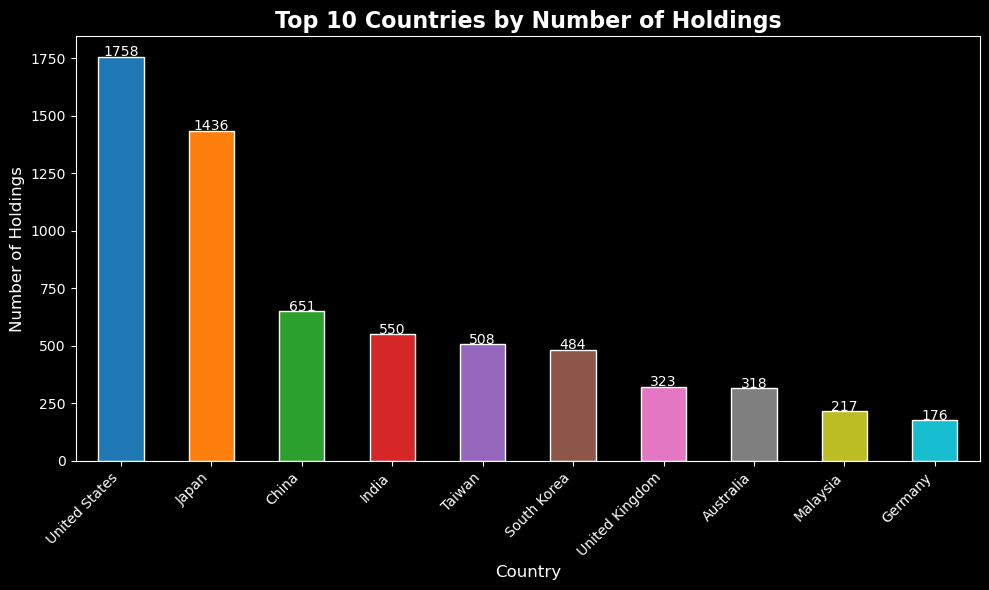

In [223]:
# Top 10 countries by number of holdings
count = fund_2024['Country'].value_counts().head(10)

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Top 10 Countries by Number of Holdings', fontsize=16, weight='bold', color='white')
plt.xlabel('Country', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

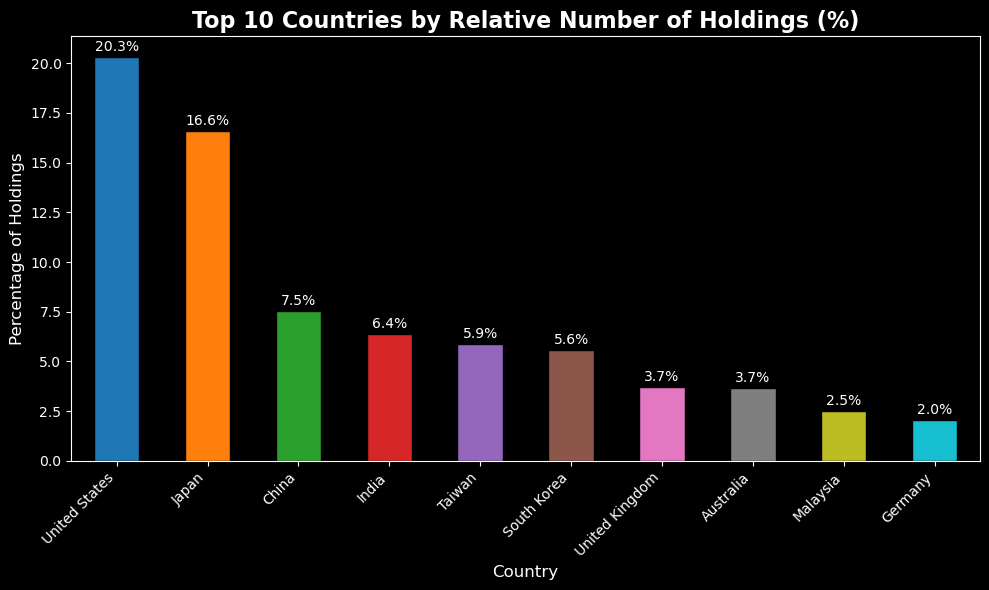

In [224]:
# Top 10 countries by relative number of holdings (%)
count_relative = (fund_2024['Country'].value_counts(normalize=True).head(10)) * 100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Top 10 Countries by Relative Number of Holdings (%)', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [225]:
fund_2024['Portfolio_Weight'].groupby(fund_2024['Country']).sum().sort_values(ascending=False).head(10)

Country
United States     55.919018
Japan              6.540745
United Kingdom     5.232338
China              3.165042
Switzerland        3.134932
Germany            3.081049
France             2.989951
India              2.396291
Taiwan             2.388093
Canada             1.949734
Name: Portfolio_Weight, dtype: float64

Text(0.5, 1.0, 'Top 10 Countries by Portfolio Weight (%)')

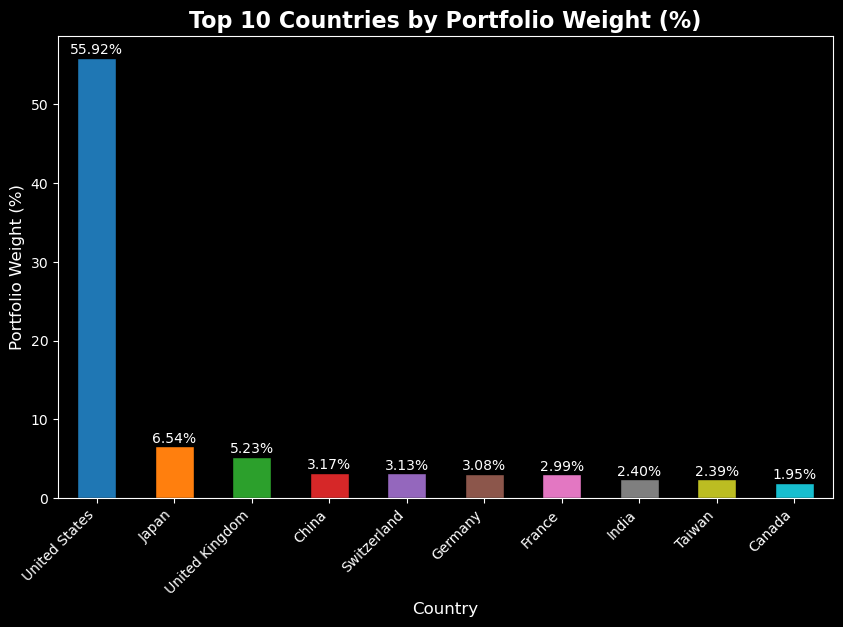

In [226]:
by_weight= fund_2024['Portfolio_Weight'].groupby(fund_2024['Country']).sum().sort_values(ascending=False).head(10)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Country', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Portfolio Weight (%)', fontsize=16, weight='bold')


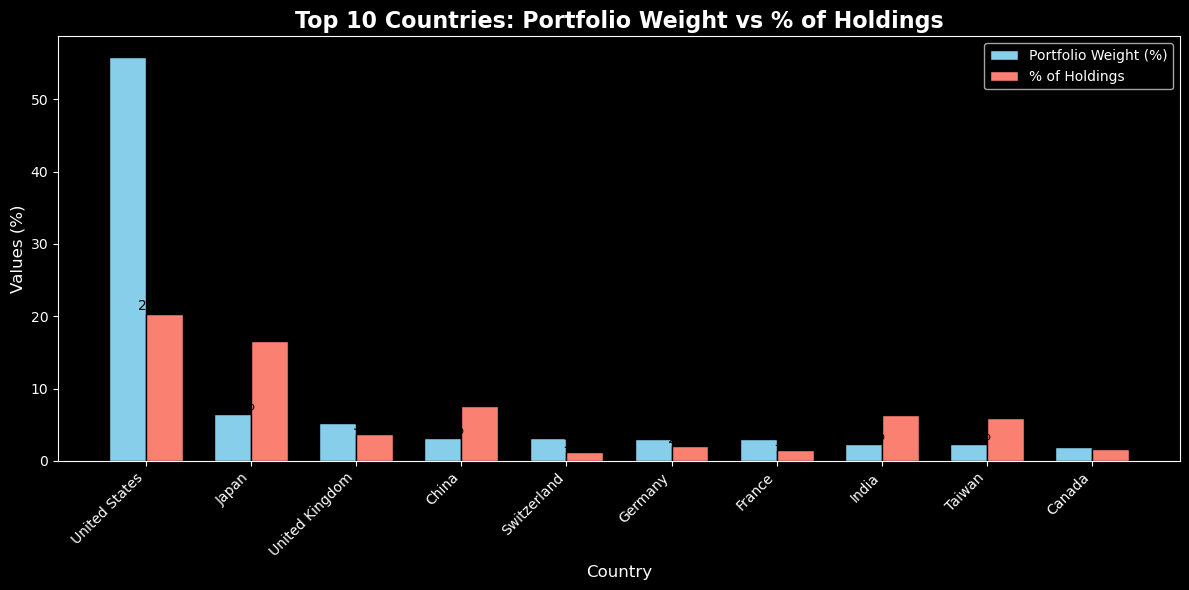

In [227]:
# Data
by_weight = fund_2024['Portfolio_Weight'].groupby(fund_2024['Country']).sum().sort_values(ascending=False).head(10)
by_count = (fund_2024['Country'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Top 10 Countries: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()


for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='black')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Fund Allocation by Country: Holdings vs Portfolio Weight – Key Insights**

The comparison between the top 10 countries by portfolio weight and by number of holdings reveals important differences in how the fund distributes its capital. 

The United States represents nearly 56% of the total portfolio weight while accounting for only around 20% of holdings, indicating a significant concentration of capital in a single developed market. This suggests that the fund prioritizes stability, liquidity, and strong performance, accepting higher country-specific risk in exchange for potentially more predictable returns.

Japan, although not as dominant, follows at some distance with 16,6% of total tenure, but contributing only around 6.5% to the overall portfolio weight.

In contrast, several East Asian markets, including China, India, and Taiwan, show a higher proportion of holdings relative to their portfolio weight. This may reflect the fund’s perspective on the long-term growth potential of East Asia, favoring broad exposure in the region despite smaller current investment sizes. Meanwhile, European and North American (Canada) countries, such as the United Kingdom, Germany, Switzerland, France, and Canada, display fewer holdings but a much larger share of portfolio weight per holding, suggesting stronger current performance and consolidated value creation.

Overall, the comparison highlights the distinction between number of holdings and capital exposure, illustrating the fund’s dual strategy of maintaining concentration in developed markets while positioning itself for the gradual expansion of East Asian economies.

## 2) Fund Allocation by Industry: Holdings vs Portfolio Weight
After reviewing country-level allocation, we now turn to the distribution of the fund’s investments across different industries.

In [228]:
fund_2024['Industry'].value_counts()

Industry
Industrials               1735
Consumer Discretionary    1469
Financials                1061
Technology                1055
Health Care                810
Real Estate                631
Basic Materials            628
Consumer Staples           571
Utilities                  265
Energy                     210
Telecommunications         210
Name: count, dtype: int64

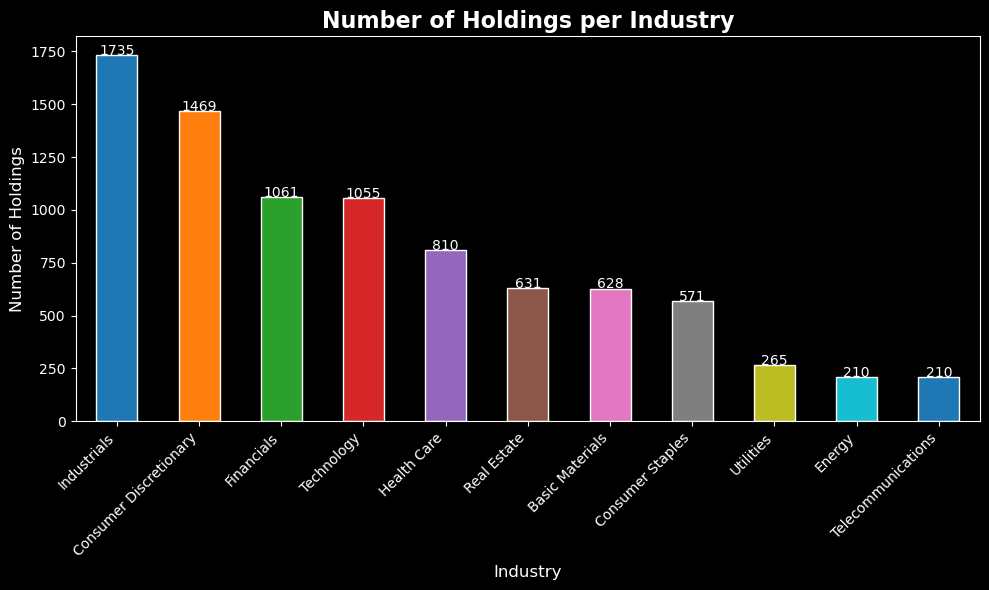

In [229]:
# Industry holdings count
count = fund_2024['Industry'].value_counts()

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Number of Holdings per Industry', fontsize=16, weight='bold', color='white')
plt.xlabel('Industry', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

In [230]:
# Industry by portfolio weight
fund_2024['Industry'].value_counts(normalize=True)*100

Industry
Industrials               20.069404
Consumer Discretionary    16.992481
Financials                12.272990
Technology                12.203586
Health Care                9.369578
Real Estate                7.299017
Basic Materials            7.264315
Consumer Staples           6.604974
Utilities                  3.065356
Energy                     2.429150
Telecommunications         2.429150
Name: proportion, dtype: float64

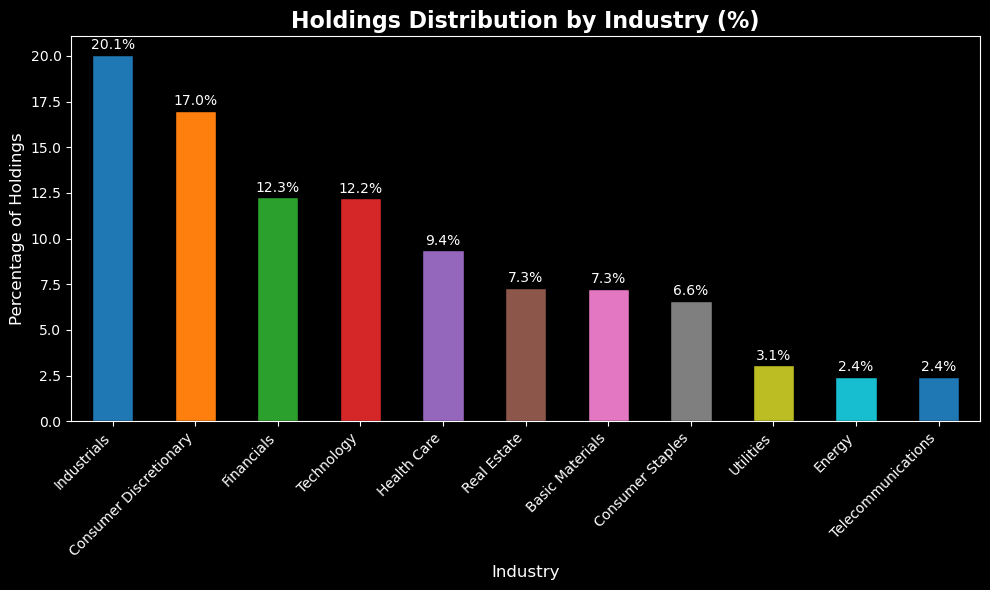

In [231]:
# Industry by relative number of holdings (%)
count_relative = fund_2024['Industry'].value_counts(normalize=True)*100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Holdings Distribution by Industry (%)', fontsize=16, weight='bold')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [232]:
fund_2024.groupby('Industry')['Portfolio_Weight'].sum().sort_values(ascending=False)

Industry
Technology                27.004519
Financials                15.374102
Consumer Discretionary    14.263017
Industrials               12.650612
Health Care                9.823415
Real Estate                4.884859
Consumer Staples           4.612489
Energy                     3.142018
Basic Materials            3.073607
Telecommunications         2.862368
Utilities                  2.308994
Name: Portfolio_Weight, dtype: float64

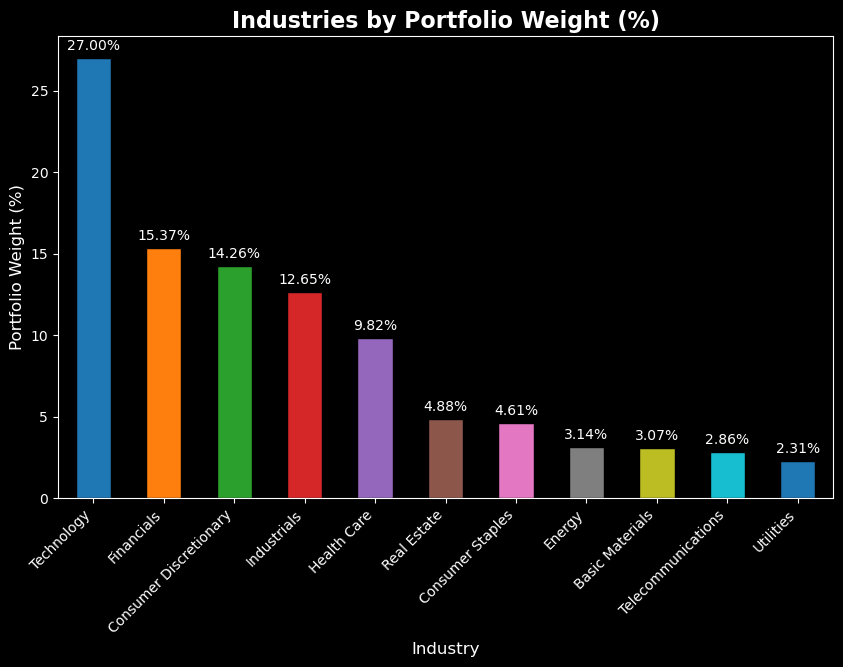

In [234]:
by_weight= fund_2024['Portfolio_Weight'].groupby(fund_2024['Industry']).sum().sort_values(ascending=False)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Industry', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Industries by Portfolio Weight (%)', fontsize=16, weight='bold')
plt.show()

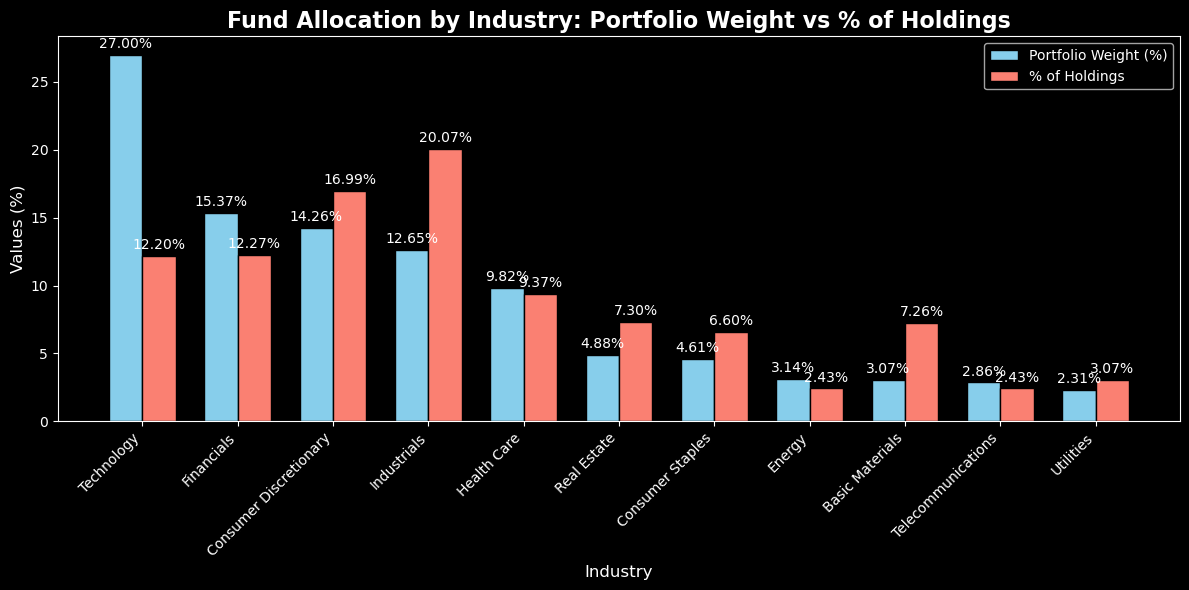

In [235]:
# Data
by_weight = fund_2024['Portfolio_Weight'].groupby(fund_2024['Industry']).sum().sort_values(ascending=False)
by_count = (fund_2024['Industry'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Industry', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Fund Allocation by Industry: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()

# Show values on top of bars in white
for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='white')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

plt.show()

**Fund Allocation by Industry: Holdings vs Portfolio Weight – Key Insights**

Analyzing the fund’s holdings by industry highlights differences between the number of holdings and portfolio weight. Industrials and Consumer Discretionary represent the largest number of holdings, reflecting the fund’s broad exposure across companies in these sectors. However, when considering portfolio weight, Technology stands out as the most significant sector, accounting for over 27% of total portfolio weight, despite being the fourth industry in terms of total number of holdings.

This discrepancy indicates that while the fund maintains diversified exposure across many companies in traditional sectors, it concentrates capital in high-value, strategically important industries such as Technology and Financials, likely due to their stronger performance and potential for long-term value creation. Sectors like Real Estate, Consumer Staples and Basic Materials have numerous holdings but contribute relatively less to portfolio weight, suggesting smaller average investment sizes per company.

Overall, the fund appears to balance diversification and concentration: it spreads its holdings across multiple sectors to mitigate risk and avoid overloading any single industry, while still allocating the largest share of capital to high-impact sectors like Technology to maximize potential returns.

## 3) Fund Allocation by Region: Holdings vs Portfolio Weight

In [236]:
fund_2024['Region'].value_counts()

Region
Asia             4386
North America    1901
Europe           1540
Oceania           352
Latin America     210
Middle East       136
Africa            120
Name: count, dtype: int64

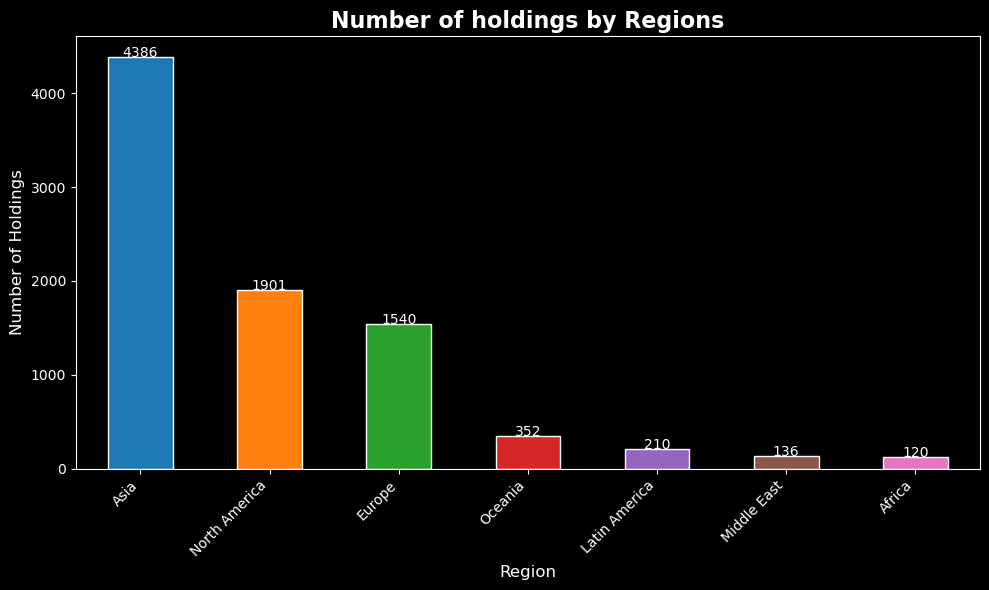

In [237]:
# Number of holdings by Region
count = fund_2024['Region'].value_counts()

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Number of holdings by Regions', fontsize=16, weight='bold', color='white')
plt.xlabel('Region', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

In [238]:
fund_2024['Region'].value_counts(normalize=True)*100

Region
Asia             50.734529
North America    21.989589
Europe           17.813765
Oceania           4.071718
Latin America     2.429150
Middle East       1.573164
Africa            1.388086
Name: proportion, dtype: float64

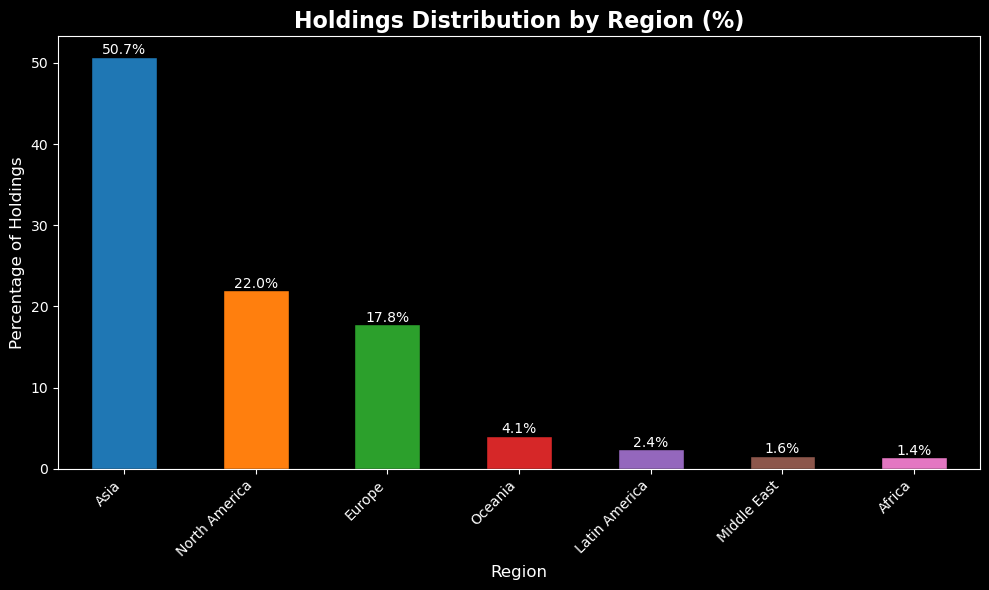

In [239]:
# Region by relative number of holdings (%)
count_relative = fund_2024['Region'].value_counts(normalize=True)*100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Holdings Distribution by Region (%)', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [241]:
fund_2024['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)

Region
North America    57.868752
Europe           21.453064
Asia             17.399995
Oceania           1.708706
Latin America     0.650874
Middle East       0.532423
Africa            0.386186
Name: Portfolio_Weight, dtype: float64

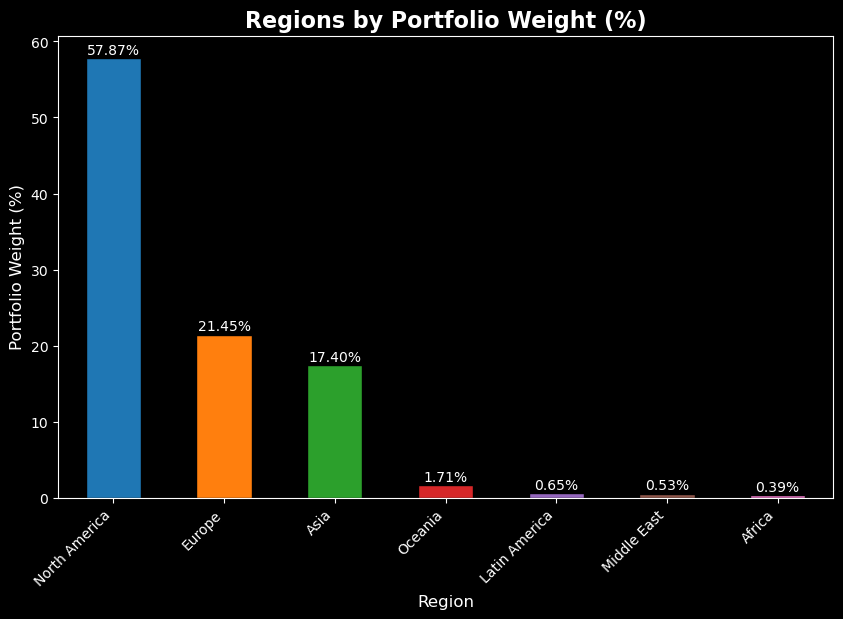

In [242]:
by_weight= fund_2024['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Region', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Regions by Portfolio Weight (%)', fontsize=16, weight='bold')
plt.show()

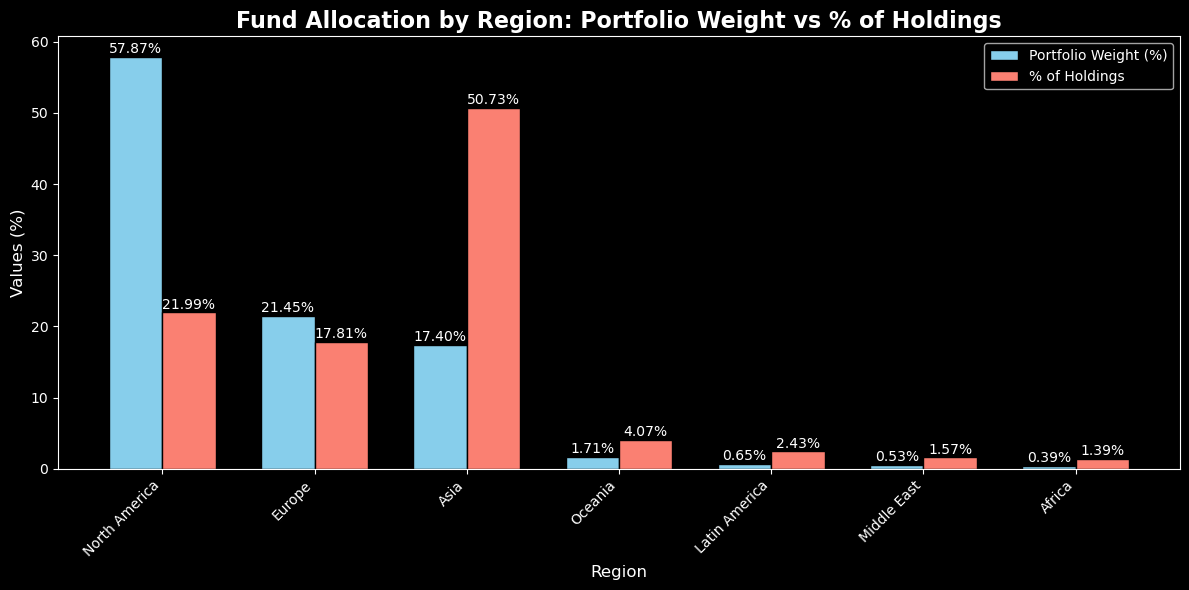

In [243]:
# Data
by_weight = fund_2024['Portfolio_Weight'].groupby(fund_2024['Region']).sum().sort_values(ascending=False)
by_count = (fund_2024['Region'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Fund Allocation by Region: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()

# Show values on top of bars in white
for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='white')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

plt.show()

**Fund Allocation by Region: Holdings vs Portfolio Weight – Key Insights**

The comparison between the relative number of holdings and portfolio weight by region highlights significant differences in how the fund allocates its capital. Asia accounts for the majority of the fund’s holdings in terms of number of companies, reflecting a broad diversification across emerging and growth markets. However, North America carries the largest share of portfolio weight, indicating that these holdings are more financially significant despite being fewer in number. Europe also exhibits a substantial share relative to its number of holdings, reflecting targeted investments in high-value companies.

This distinction between number of holdings and capital exposure provides insight into the fund’s strategic allocation: it diversifies widely in regions like Asia while concentrating financial weight in regions with established markets such as North America and Europe. Less represented regions including Oceania, Latin America, the Middle East, and Africa collectively contribute a minor share of both holdings and portfolio weight.

## Outcomes 

1) **Industry**: Technology (27.1%) and Financials (16.7%) are the sectors with the highest portfolio weight, indicating where the fund has the most significant capital allocation.  

2) **Country**: The United States accounts for approximately 54.7% of the total portfolio weight, emphasizing its significance within the fund. This helps us understand how the fund’s capital is distributed at the country level and which markets contribute most to its overall exposure.

3) **Region**: Europe (~22.2%) and Asia (~17.5%) are the regions with the largest contribution outside North America. Canada is excluded from the regional analysis to avoid redundancy, as its portfolio weight is comparatively minor.  




## For running this analysis in other fund's notebooks
Since in this notebook it was carried out manually as it is easier to comment and analyze. For further benchmarks and analysis of the allocations of the fund in different years, a function was prepared:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_dimension(df, dimension):
    """
    Generate three barplots for a given categorical dimension:
    1. Count of holdings
    2. Percentage of holdings
    3. Total portfolio weight
    """
    unique_values = df[dimension].dropna().unique()
    print(f"🔹 Analyzing: {dimension} ({len(unique_values)} categories)")

    # 1. Count
    count = df[dimension].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(x=count.values, y=count.index, palette='mako')
    plt.title(f'{dimension}: Distribution (Count)')
    plt.xlabel('Number of Companies')
    plt.ylabel(dimension)
    plt.show()

    # 2. Percentage
    pct = df[dimension].value_counts(normalize=True) * 100
    plt.figure(figsize=(8,4))
    sns.barplot(x=pct.values, y=pct.index, palette='crest')
    plt.title(f'{dimension}: Distribution (%)')
    plt.xlabel('Share of Companies (%)')
    plt.ylabel(dimension)
    plt.show()

    # 3. Portfolio Weight
    weight = df.groupby(dimension)['Portfolio_Weight'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=weight.values, y=weight.index, palette='viridis')
    plt.title(f'{dimension}: Portfolio Weight')
    plt.xlabel('Total Portfolio Weight')
    plt.ylabel(dimension)
    plt.show()


# Third objective: quick look into Tech, USA, Asia and Europe

In [67]:
#Making a dataframe for each of the top 2 industries: Technology and Financials
tech_df = fund_2024[fund_2024['Industry'] == 'Technology']
fin_df = fund_2024[fund_2024['Industry'] == 'Financials']

In [63]:
tech_df['Region'].value_counts()

Region
Asia             630
North America    264
Europe           111
Oceania           32
Middle East       10
Africa             4
Latin America      4
Name: count, dtype: int64

In [68]:
tech_df.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
7126,Technology,Europe,United Kingdom,1Spatial Plc,2936068,2.99,2.99,0.000228
7127,Technology,Asia,China,3peak Inc,2519921,0.15,0.15,0.000196


In [69]:
tech_df['Region'].value_counts(normalize=True)*100

Region
Asia             59.715640
North America    25.023697
Europe           10.521327
Oceania           3.033175
Middle East       0.947867
Africa            0.379147
Latin America     0.379147
Name: proportion, dtype: float64

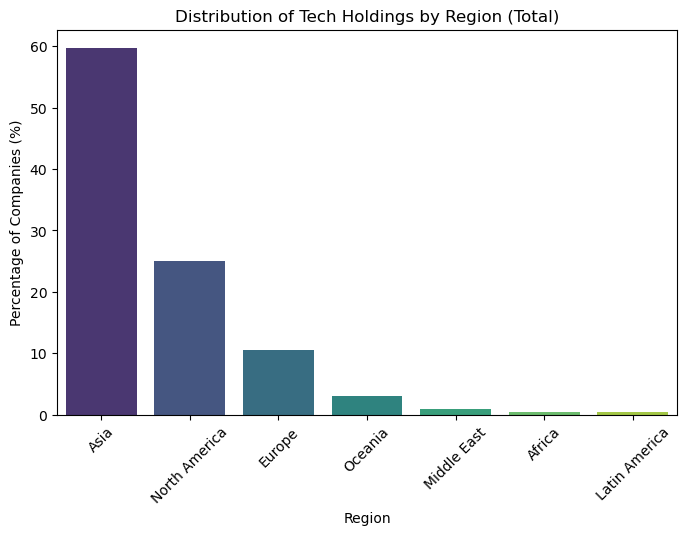

In [92]:
region_pct = tech_df['Region'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=region_pct.index, y=region_pct.values, palette='viridis')
plt.ylabel('Percentage of Companies (%)')
plt.xlabel('Region')
plt.title("Distribution of Tech Holdings by Region (Total)")
plt.xticks(rotation=45)
plt.show()

In [81]:
tech_df.groupby('Region')['Portfolio_Weight'].sum().sort_values(ascending=False)


Region
North America    20.954273
Asia              4.016784
Europe            1.884694
Oceania           0.090349
Africa            0.048268
Middle East       0.009748
Latin America     0.000404
Name: Portfolio_Weight, dtype: float64

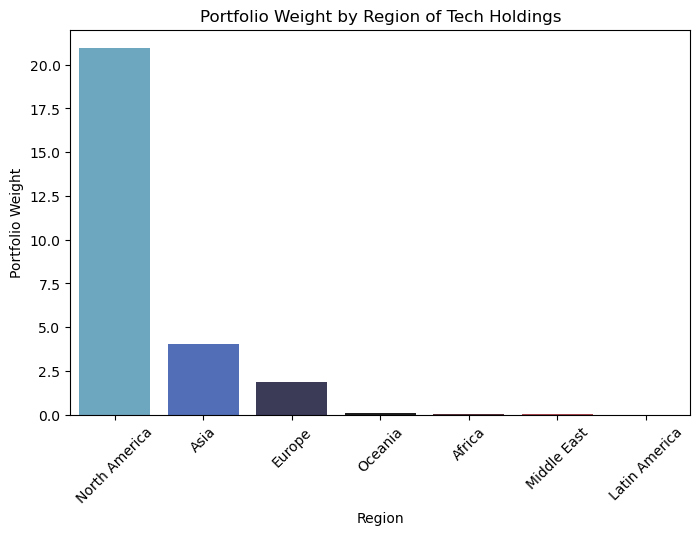

In [ ]:
# Sum of Portfolio_Weight by region
region_weight = tech_df.groupby('Region')['Portfolio_Weight'].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=region_weight.index, y=region_weight.values, palette='icefire')
plt.ylabel('Portfolio Weight')
plt.xlabel('Region')
plt.title('Portfolio Weight by Region of Tech Holdings')
plt.xticks(rotation=45)
plt.show()


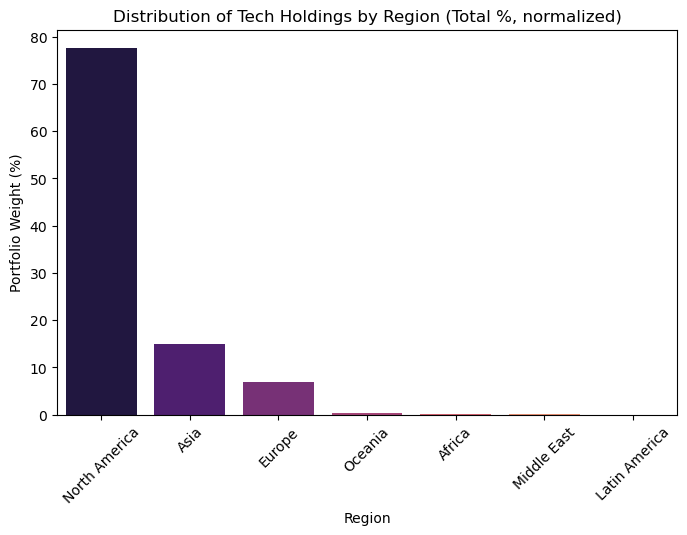

In [98]:
#Portfolio Weight by region normalized to 100%

region_weight = tech_df.groupby('Region')['Portfolio_Weight'].sum().sort_values(ascending=False)
region_weight_pct = region_weight / region_weight.sum() * 100

plt.figure(figsize=(8,5))
sns.barplot(x=region_weight_pct.index, y=region_weight_pct.values, palette='magma')
plt.ylabel('Portfolio Weight (%)')
plt.xlabel('Region')
plt.title('Distribution of Tech Holdings by Region (Total %, normalized)')
plt.xticks(rotation=45)
plt.show()

In [116]:
tech_df[tech_df['Region'] == 'Asia'].sort_values(by='Portfolio_Weight', ascending=False).head(20)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
7759,Technology,Asia,Taiwan,Taiwan Semiconductor Manufacturing Co Ltd,17406706904,1.85,1.85,1.254154
7780,Technology,Asia,China,Tencent Holdings Ltd,8347307312,1.42,1.42,0.601424
7714,Technology,Asia,South Korea,SK Hynix Inc,2628942427,1.67,1.67,0.189415
7795,Technology,Asia,Japan,Tokyo Electron Ltd,1413241168,1.56,1.56,0.101824
7466,Technology,Asia,China,Meituan,1282552797,0.71,1.32,0.092408
7670,Technology,Asia,Singapore,Sea Ltd,1103831508,1.04,1.21,0.079531
7293,Technology,Asia,Taiwan,Hon Hai Precision Industry Co Ltd,929310108,1.21,1.21,0.066957
7460,Technology,Asia,Taiwan,MediaTek Inc,871701733,1.27,1.27,0.062806
6924,Technology,Asia,Japan,Advantest Corp,829557579,1.47,1.47,0.059770
7228,Technology,Asia,Japan,Fujitsu Ltd,765553812,1.52,1.52,0.055158


In [102]:
tech_df[tech_df['Region'] == 'Asia'].sort_values(by='Portfolio_Weight', ascending=False).groupby('Country')['Name'].count().sort_values(ascending=False)

Country
Taiwan         210
Japan          181
China           84
South Korea     72
India           34
Malaysia        25
Hong Kong        8
Thailand         7
Singapore        4
Indonesia        3
Sri Lanka        1
Vietnam          1
Name: Name, dtype: int64

In [100]:
tech_df[tech_df['Region'] == 'Asia'].sort_values(by='Portfolio_Weight', ascending=False).groupby('Country')['Portfolio_Weight'].sum().sort_values(ascending=False)

Country
Taiwan         1.855116
China          0.871981
Japan          0.609784
India          0.271555
South Korea    0.216296
Singapore      0.135573
Hong Kong      0.026029
Malaysia       0.018373
Indonesia      0.004600
Vietnam        0.004323
Thailand       0.003098
Sri Lanka      0.000057
Name: Portfolio_Weight, dtype: float64

## Insights of the Analysis of Tech Holdings by Region

The tech holdings show an interesting contrast between number of companies and portfolio weight across regions.  

- **Asia** has the largest share of companies, representing nearly 60% of all tech holdings. However, despite this high count, its contribution to the total portfolio weight is relatively modest. This suggests that the individual holdings in Asia are smaller in size.  Taiwan is the most significant market for the fund in this region, leading both the total number of holdings and the portfolio weight of tech. This shows the interest of the fund in this growing market related to semiconductors and other cuttig-edge technologies.

- **North America**, on the other hand, accounts for only about 25% of the companies but dominates the portfolio weight. This indicates that North American holdings are much larger individually, giving them a disproportionate impact on the total portfolio.  

- **Europe** has a moderate presence in both company count and portfolio weight, while Oceania, Middle East, Africa, and Latin America have minimal exposure in both dimensions.  

Overall, the fund’s tech allocation is highly concentrated in North America by weight, while the largest number of companies is in Asia. This highlights a strategy where the fund holds **fewer but larger positions in North America**, and **more but smaller positions in Asia**, maintaining some geographic diversification but with clear concentration in high-impact markets.


In [113]:
fin_df['Region'].value_counts()

Region
Asia             422
North America    278
Europe           229
Oceania           45
Middle East       31
Africa            29
Latin America     27
Name: count, dtype: int64

In [114]:
fin_df['Region'].value_counts(normalize=True)*100

Region
Asia             39.773798
North America    26.201697
Europe           21.583412
Oceania           4.241282
Middle East       2.921772
Africa            2.733270
Latin America     2.544769
Name: proportion, dtype: float64

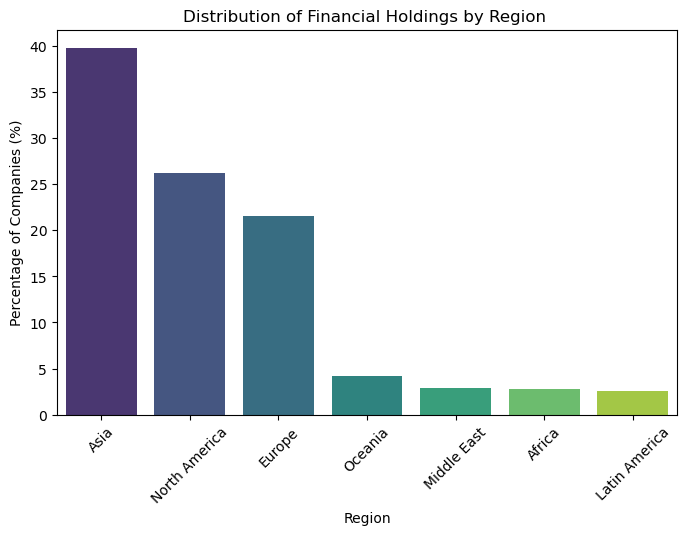

In [117]:
region_pct = fin_df['Region'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=region_pct.index, y=region_pct.values, palette='viridis')
plt.ylabel('Percentage of Companies (%)')
plt.xlabel('Region')
plt.title("Distribution of Financial Holdings by Region ")
plt.xticks(rotation=45)
plt.show()


In [119]:
fin_df.groupby('Region')['Portfolio_Weight'].sum().sort_values(ascending=False)

Region
North America    6.838680
Europe           4.417620
Asia             3.151497
Oceania          0.495004
Middle East      0.189166
Latin America    0.141263
Africa           0.140872
Name: Portfolio_Weight, dtype: float64

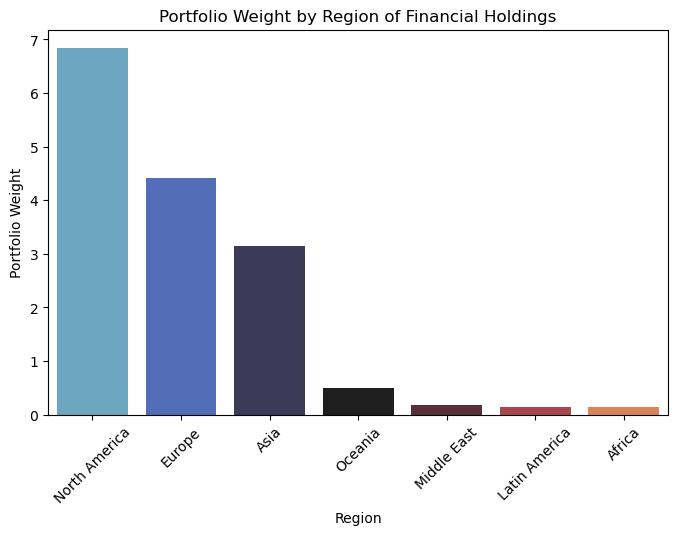

In [118]:

# Sum of Portfolio_Weight by region
region_weight = fin_df.groupby('Region')['Portfolio_Weight'].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=region_weight.index, y=region_weight.values, palette='icefire')
plt.ylabel('Portfolio Weight')
plt.xlabel('Region')
plt.title('Portfolio Weight by Region of Financial Holdings')
plt.xticks(rotation=45)
plt.show()

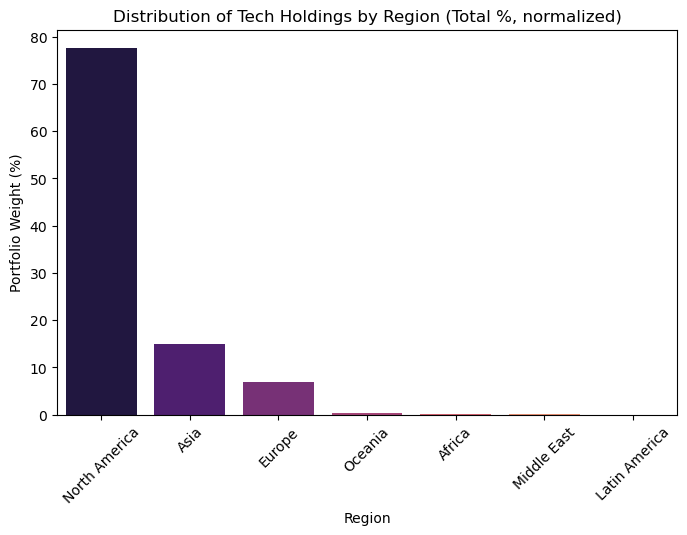

In [120]:
#Portfolio Weight by region normalized to 100%

region_weight = tech_df.groupby('Region')['Portfolio_Weight'].sum().sort_values(ascending=False)
region_weight_pct = region_weight / region_weight.sum() * 100

plt.figure(figsize=(8,5))
sns.barplot(x=region_weight_pct.index, y=region_weight_pct.values, palette='magma')
plt.ylabel('Portfolio Weight (%)')
plt.xlabel('Region')
plt.title('Distribution of Tech Holdings by Region (Total %, normalized)')
plt.xticks(rotation=45)
plt.show()

## Insights of Financial Holdings by Region

The financial holdings display a more balanced regional distribution compared to the tech sector, though clear differences remain between company presence and portfolio weight.  

- **Asia** has the largest share of companies, representing almost 40% of the total. However, its overall portfolio weight is comparatively modest, suggesting that most Asian financial holdings are smaller individual positions.  

- **North America** and **Europe** show the opposite pattern: despite having fewer companies (around 26% and 22%, respectively), they dominate the portfolio weight. This indicates that the fund’s largest financial positions are concentrated in these regions, reflecting a focus on established markets.  

- **Oceania**, **Middle East**, **Africa**, and **Latin America** together account for a small portion of both the number of companies and total weight, implying limited exposure to emerging or peripheral markets.  

Overall, the fund maintains broader geographic diversification in financials than in tech, but with clear overweight positions in North America and Europe, where the portfolio is most heavily invested despite fewer holdings.

## Industry analysis by region

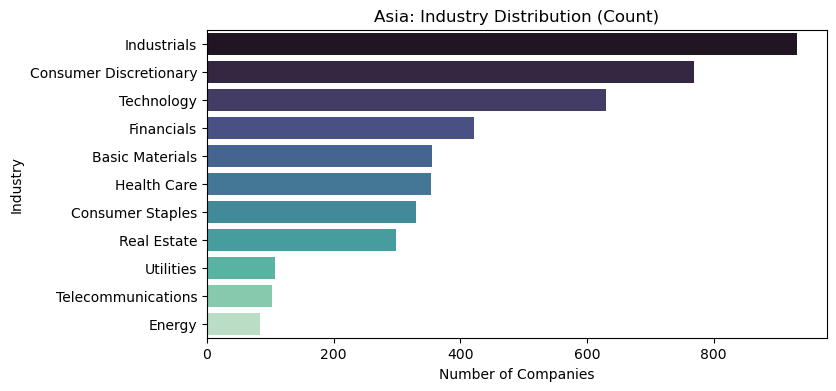

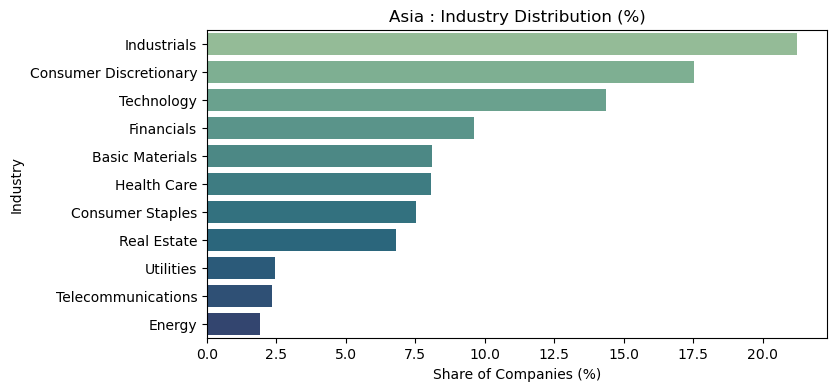

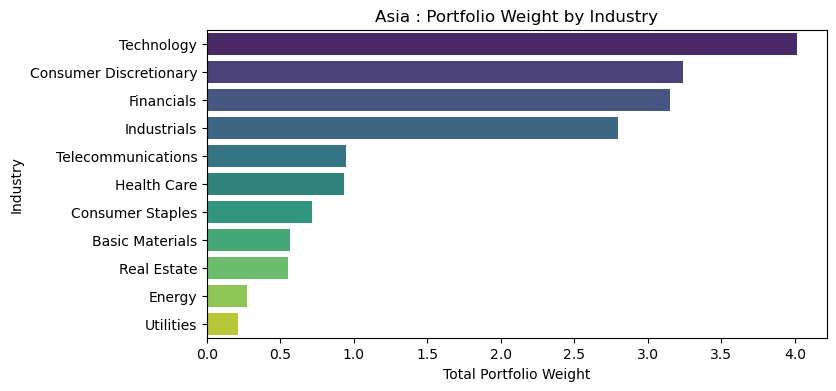

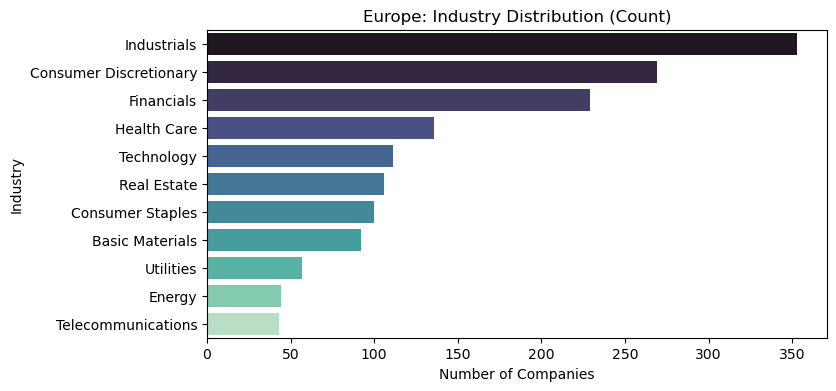

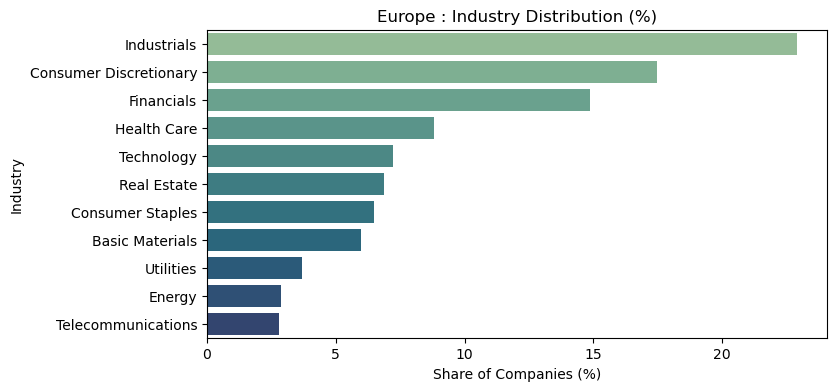

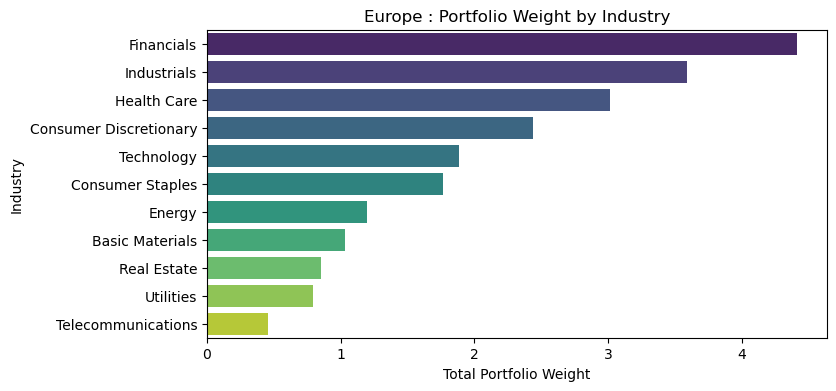

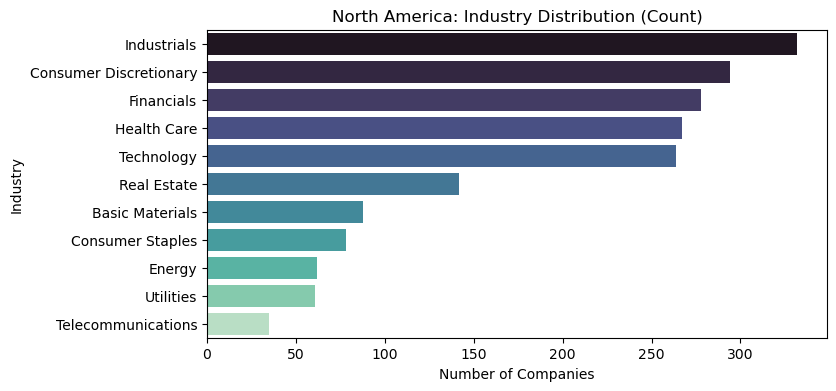

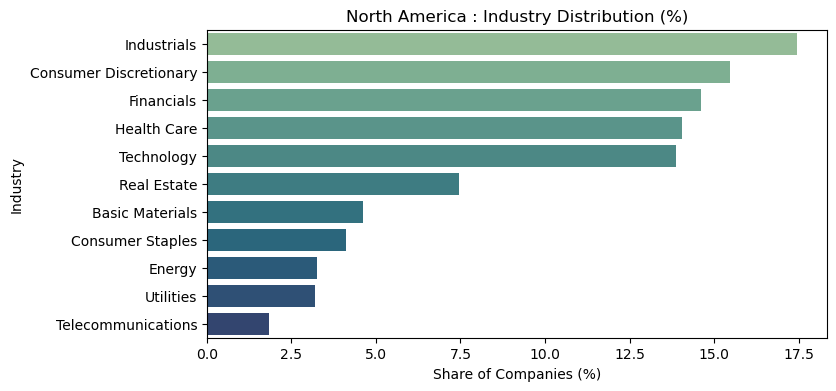

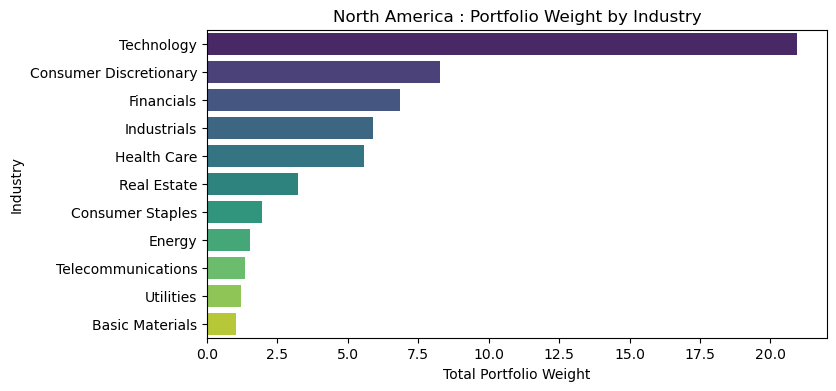

In [ ]:
#Regions to analyse
regions = ['Asia', 'Europe', 'North America']

for region in regions:
    df_region = fund_2024[fund_2024['Region'] == region]
    
    #Industry Counts 
    industry_counts = df_region['Industry'].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='mako')
    plt.title(f'{region}: Industry Distribution (Count)')
    plt.xlabel('Number of Companies')
    plt.ylabel('Industry')
    plt.show()
    
    #Industry Percentage (Normalized Value Counts)
    industry_pct = df_region['Industry'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8,4))
    sns.barplot(x=industry_pct.values, y=industry_pct.index, palette='crest')
    plt.title(f'{region} : Industry Distribution (%)')
    plt.xlabel('Share of Companies (%)')
    plt.ylabel('Industry')
    plt.show()
    
    #Portfolio Weight by Industry 
    industry_weight = df_region.groupby('Industry')['Portfolio_Weight'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=industry_weight.values, y=industry_weight.index, palette='viridis')
    plt.title(f'{region} : Portfolio Weight by Industry')
    plt.xlabel('Total Portfolio Weight')
    plt.ylabel('Industry')
    plt.show()


## Insights of theIndustry Analysis by Region

This section provides a detailed overview of the industry composition across Asia, Europe, and North America, considering both the **number of companies** (counts and percentages) and **portfolio weight**.



**Asia**

- **Company Distribution:**  
  The largest share of companies in Asia belongs to **Industrials (21.2%)**, followed by **Consumer Discretionary (17.5%)** and **Technology (14.4%)**. Other notable sectors include Financials (9.6%), Basic Materials (8.1%), and Health Care (8.1%). Minor sectors such as Utilities and Telecommunications account for around 2.4% each.

- **Portfolio Weight:**  
  Despite Industrials having the largest number of companies, **Technology leads in portfolio weight (4.02%)**, followed by Consumer Discretionary (3.24%) and Financials (3.15%). Industrials account for 2.80%, indicating that individual technology companies are generally **heavier holdings** compared to industrials.

**Insight:** Asia exhibits a broad company distribution, but portfolio weight is more concentrated in high-impact sectors like Technology, Consumer Discretionary, and Financials.



**Europe**

- **Company Distribution:**  
  Europe is dominated by **Industrials (22.9%)**, Consumer Discretionary (17.5%), and Financials (14.9%). Health Care and Technology follow with moderate representation (8.8% and 7.2%, respectively).

- **Portfolio Weight:**  
  The largest portfolio weights are in **Financials (4.42%)** and Industrials (3.59%), followed by Health Care (3.02%) and Consumer Discretionary (2.44%). Technology accounts for 1.88%, showing that **Europe’s portfolio is weighted towards stable, mid-sized financial and industrial holdings** rather than tech.

**Insight:** Europe shows a **balanced industry presence**, but portfolio weight favors Financials and Industrials, reflecting a **more conservative allocation**.



**North America**

- Company Distribution:
  North America has a relatively even spread among top sectors: Industrials (17.5%), Consumer Discretionary (15.5%), Financials (14.6%), Health Care (14.0%), and Technology (13.9%). Real Estate, Consumer Staples, Energy, and other sectors make up smaller portions.

- Portfolio Weight:  
  Here, **Technology dominates (20.95%)**, far above all other sectors, followed by Consumer Discretionary (8.26%), Financials (6.84%), and Industrials (5.90%). Health Care (5.59%) and Real Estate (3.22%) are also significant. Smaller sectors like Utilities and Basic Materials have very limited weight.

**Insight:** In North America, portfolio weight is **highly concentrated in Technology**, despite the relatively even distribution of companies across multiple sectors. This reflects a **high-impact, concentrated investment strategy**, favoring large tech holdings.



 Overall Observations

- **Asia**: Many companies but moderate portfolio weights per sector; portfolio is concentrated in Technology, Consumer Discretionary, and Financials.  
- **Europe**: Fewer tech-heavy holdings; portfolio is more stable, favoring Financials and Industrials.  
- **North America**: Portfolio weight is heavily concentrated in Technology, despite a diverse company distribution.  
- **Comparative Insight:** The fund strategically balances *road exposure in Asia, stable allocation in Europe, and high concentration in key sectors in North America, combining diversification and targeted high-impact positions.


In [142]:
# Filter Technology rows
tech_df = fund_2024[fund_2024['Industry'] == 'Technology']

# Count of Technology in North America
tech_na_count = (tech_df['Region'] == 'North America').sum()

# Total number of companies in the fund
total_companies = fund_2024.shape[0]

# Percentage
tech_na_pct = tech_na_count / total_companies * 100
print(f"Technology in North America: {tech_na_pct:.2f}% of total companies")


Technology in North America: 3.05% of total companies


In [143]:
# Filter Technology rows
tech_df = fund_2024[fund_2024['Industry'] == 'Technology']

# Sum Portfolio Weight for Technology in North America
tech_na_weight = tech_df.loc[tech_df['Region'] == 'North America', 'Portfolio_Weight'].sum()

# Total portfolio weight (should be ~1 or 100%)
total_portfolio_weight = fund_2024['Portfolio_Weight'].sum()

# Percentage
tech_na_weight_pct = tech_na_weight / total_portfolio_weight * 100
print(f"Portfolio weight of Technology in North America: {tech_na_weight_pct:.2f}% of total portfolio weight")



Portfolio weight of Technology in North America: 20.95% of total portfolio weight


## Key insight
In North America, there is a notable discrepancy between the number of companies and their impact on the portfolio. **Technology in North America:** 13.9% of companies of the sector that represent just 3.05% of the total holdings of the fund, but these account for **20.95% of the portfolio weight**, highlighting that a few high-cap tech companies dominate the portfolio. In contrast, sectors like Utilities have a large number of companies but contribute very little to the total portfolio weight.


In [151]:
fund_2024

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.480000,0.48,6.428023e-04
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.750000,1.75,1.948918e-04
2,Basic Materials,Europe,Spain,Acerinox SA,44222411,1.810000,1.81,3.439176e-03
3,Basic Materials,Asia,Japan,Achilles Corp,346429,0.260000,0.26,2.694178e-05
4,Basic Materials,North America,Canada,Aclara Resources Inc,93266,0.180000,0.18,7.253296e-06
...,...,...,...,...,...,...,...,...
8654,Utilities,Asia,China,Xinyi Energy Holdings Ltd,344,1.059142,0.00,2.675288e-08
8655,Utilities,Asia,Malaysia,YTL Corp Bhd,64203424,0.970000,0.97,4.993100e-03
8656,Utilities,Asia,Malaysia,YTL Power International Bhd,58886955,0.730000,0.73,4.579638e-03
8657,Utilities,Europe,United Kingdom,Yu Group plc,3520023,0.930000,0.93,2.737522e-04


In [ ]:
weights = fund_2024['Portfolio_Weight'].values

# Normalize to sum 1
weights_norm = weights / weights.sum()

# Gini coefficient
def gini(x):
    x = np.sort(x)
    n = len(x)
    return (2*np.sum((np.arange(1, n+1))*x))/(n*np.sum(x)) - (n+1)/n

gini_index = gini(weights_norm)
print("Gini coefficient:", gini_index)

# HHI
hhi = np.sum(weights_norm**2)
print("Herfindahl-Hirschman Index:", hhi)




Gini coefficient: 0.8801107799643195
Herfindahl-Hirschman Index: 0.006329254975104555
Top 5 companies % of portfolio: 0.004311065680024353


# Fourth objective: Portfolio Concentration Analysis

## Gini Coefficient
The Gini coefficient is a measure of inequality among values. In the context of a portfolio, it captures how unevenly weights are distributed among holdings. A value of 0 indicates perfect equality where all holdings have the same weight, while a value of 1 indicates extreme concentration where a single holding dominates the portfolio.  


In [ ]:

# Values to np array
weights_percent = fund_2024['Portfolio_Weight'].values

# Convert to fraction
weights = weights_percent / 100

# Gini Coefficient 
def gini(x):
    x = np.sort(x)  # sort from smallest to largest
    n = len(x)
    cumx = np.cumsum(x)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

gini_index = gini(weights)

print(f"Gini Coefficient: {gini_index:.4f}")



Gini Coefficient: 0.8801



**Interpretation of Results**  
The portfolio has a Gini coefficient of 0.8801. This indicates a high level of inequality in weights, meaning a few holdings carry much more weight than the rest.



## Lorenz Curve

The Lorenz Curve is a graphical representation of the distribution of portfolio weights. It plots the cumulative share of holdings (from smallest to largest) on the x-axis against the cumulative share of portfolio weight on the y-axis. The diagonal line represents perfect equality, where each holding contributes equally to the portfolio. The farther the Lorenz Curve lies below this line, the greater the inequality in the distribution, meaning a few holdings dominate the total weight.

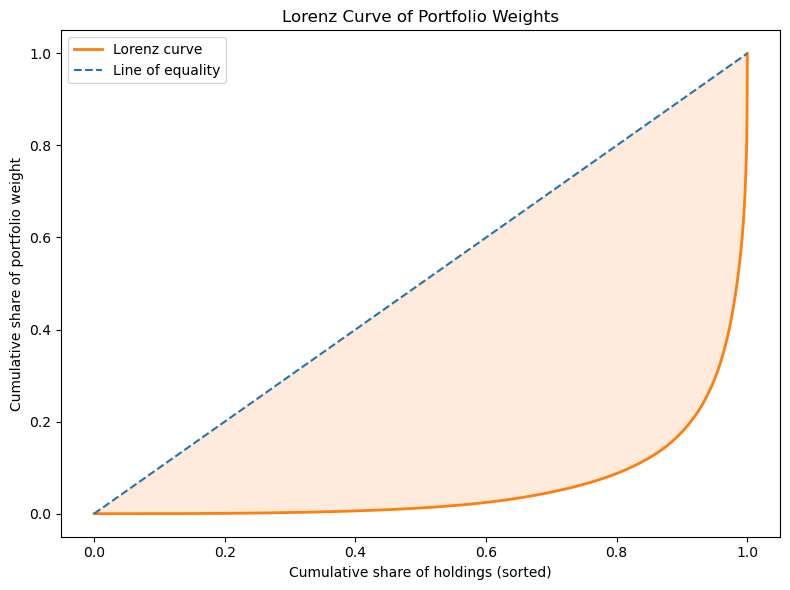

In [163]:
# Lorenz curve for portfolio weights
weights = fund_2024['Portfolio_Weight'].values
weights = np.sort(weights) / weights.sum()
cum_weights = np.cumsum(weights)
lorenz_y = np.concatenate(([0.0], cum_weights))
lorenz_x = np.linspace(0.0, 1.0, len(lorenz_y))

plt.figure(figsize=(8,6))
plt.plot(lorenz_x, lorenz_y, label='Lorenz curve', color='C1', lw=2)
plt.plot([0,1], [0,1], label='Line of equality', color='C0', lw=1.5, linestyle='--')
plt.fill_between(lorenz_x, lorenz_y, lorenz_x, where=(lorenz_x>=lorenz_y), color='C1', alpha=0.15)
plt.xlabel('Cumulative share of holdings (sorted)')
plt.ylabel('Cumulative share of portfolio weight')
plt.title('Lorenz Curve of Portfolio Weights')
plt.legend()
plt.tight_layout()
plt.show()

**Interpretation of Results**
The Lorenz Curve shows a pronounced deviation from the line of equality, reflecting strong concentration. This is consistent with the Gini coefficient of 0.8801, which indicates that a small number of holdings account for most of the portfolio’s total weight.


## Herfindahl-Hirschman Index
The Herfindahl-Hirschman Index measures absolute concentration by summing the squares of each holding's weight. Values closer to 0 indicate low concentration, while values closer to 1 indicate high concentration dominated by a few holdings.  


In [168]:
# HHI
hhi_index = np.sum(weights**2)
print(f"Herfindahl-Hirschman Index:: {hhi_index:.4f}")

Herfindahl-Hirschman Index:: 0.0063


**Interpretation of Results**  
The portfolio has an HHI of 0.0063. Despite the high inequality indicated by the Gini coefficient, the low HHI shows that **no single holding dominates excessively** and the portfolio is relatively diversified in absolute terms. The next graph shows that while the relatively low HHI value indicates that the portfolio is not excessively concentrated, the top holdings represent a significant share of the total portfolio, 

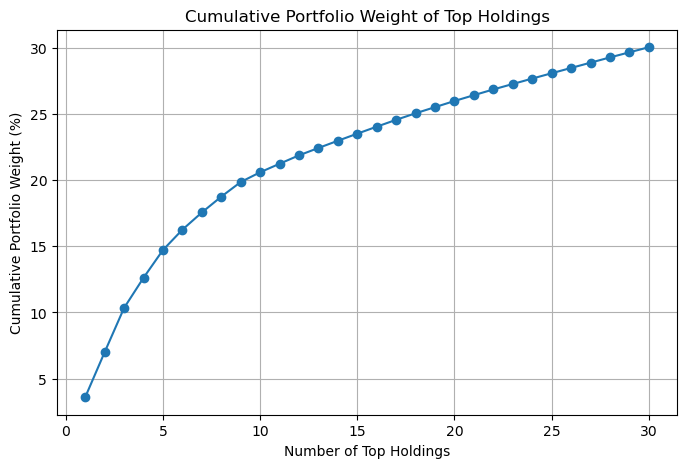

Top 10 holdings = 20.59% of portfolio
Top 30 holdings = 30.03% of portfolio


In [162]:
# Cumulative portfolio weight of top N holdings
N = 30
sorted_weights = fund_2024.sort_values('Portfolio_Weight', ascending=False)['Portfolio_Weight'].values
cum_weight = np.cumsum(sorted_weights)
plt.figure(figsize=(8,5))
plt.plot(range(1, N+1), cum_weight[:N], marker='o')
plt.xlabel('Number of Top Holdings')
plt.ylabel('Cumulative Portfolio Weight (%)')
plt.title('Cumulative Portfolio Weight of Top Holdings')
plt.grid(True)
plt.show()
print(f"Top 10 holdings = {cum_weight[9]:.2f}% of portfolio")
print(f"Top 30 holdings = {cum_weight[29]:.2f}% of portfolio")

## Stress Test: Drop of 20% in Top 30 Portfolio-Weight Holdings 
A stress test is conducted to evaluate portfolio sensitivity to losses in its largest positions. The market value of the top 20 holdings was reduced by 20%, and portfolio weights were recalculated to observe the impact on overall concentration.  

This analysis complements the concentration metrics (Gini and HHI) by illustrating how the portfolio structure would react under adverse conditions.


In [169]:
# Stress test: Drop top 30 holdings by 20%
top20 = fund_2024.sort_values('Portfolio_Weight', ascending=False).head(30)['Name']
impact = fund_2024.copy()
impact.loc[impact['Name'].isin(top20), 'Market_Value_USD'] *= 0.8
impact['Portfolio_Weight'] = impact['Market_Value_USD'] / impact['Market_Value_USD'].sum() * 100

# Calculate total portfolio weight of top 30 before and after
before = fund_2024.loc[fund_2024['Name'].isin(top20), 'Portfolio_Weight'].sum()
after = impact.loc[impact['Name'].isin(top20), 'Portfolio_Weight'].sum()
print(f"Top 30 holdings before drop: {before:.2f}%")
print(f"Top 30 holdings after 20% drop: {after:.2f}%")
print(f"Portfolio weight lost: {before - after:.2f}%")

Top 30 holdings before drop: 30.03%
Top 30 holdings after 20% drop: 25.56%
Portfolio weight lost: 4.47%


**Interpretation of Results**  
The results indicate that although the largest holdings represent a significant share of the total portfolio, the overall exposure remains contained. A 20% decline in the top 30 holdings leads to only a 4.47% reduction in total portfolio weight, suggesting that diversification across smaller positions effectively mitigates concentration risk. This aligns with the low HHI value and the Lorenz curve, both of which reflect a moderately diversified structure despite noticeable inequality in individual weights.

In [172]:
import plotly.graph_objects as go

# Datos del stress test
total_before = 100
loss = 4.47  # del resultado del stress test
total_after = total_before - loss

# Crear figura
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Before Shock', 'After Shock'],
    y=[total_before, total_after],
    text=[f'{total_before:.2f}%', f'{total_after:.2f}%'],
    textposition='auto',
    marker_color=['#007bff', '#dc3545']
))

fig.update_layout(
    title='Portfolio Value Before and After 20% Drop in Top 30 Holdings',
    yaxis_title='Total Portfolio Weight (%)',
    xaxis_title='Stress Scenario',
    yaxis=dict(range=[95, 100]),  # enfoca la escala para notar la leve diferencia
    template='plotly_white',
    showlegend=False
)

fig.show()


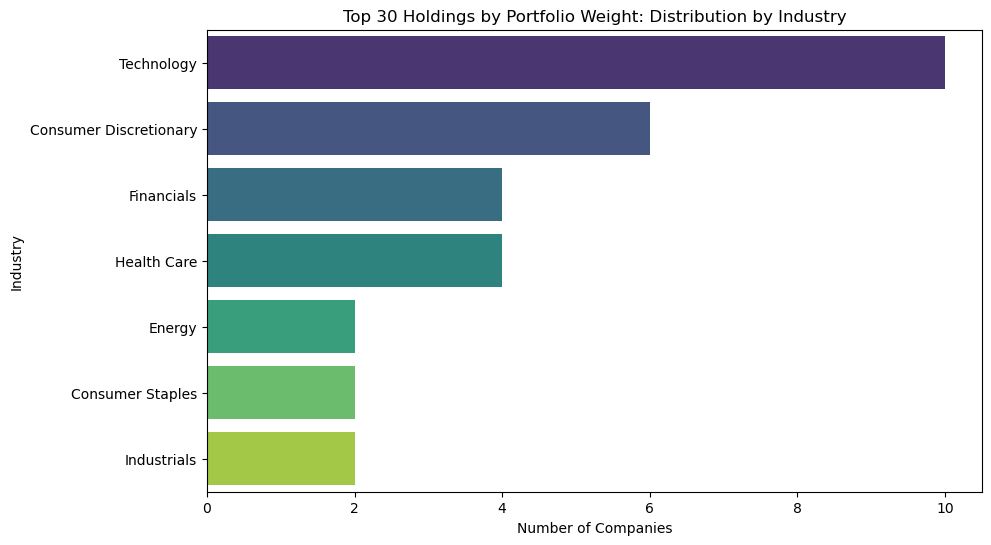

In [ ]:
#Top 30 holdings by Portfolio_Weight categorized by Industry
top30 = fund_2024.nlargest(30, 'Portfolio_Weight')

industry_counts = top30['Industry'].value_counts()


plt.figure(figsize=(10,6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.title('Top 30 Holdings by Portfolio Weight: Distribution by Industry')
plt.show()


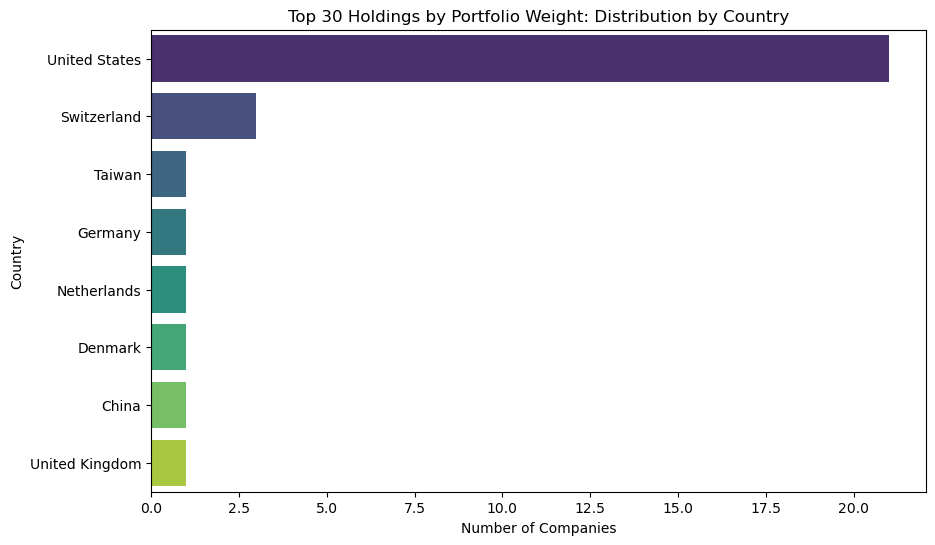

In [197]:
industry_counts = top30['Country'].value_counts()


plt.figure(figsize=(10,6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.title('Top 30 Holdings by Portfolio Weight: Distribution by Country')
plt.show()


## Yearly Comparison of the Portfolio Concentration (2018-2024)

In [ ]:
# Import and process data for multiple years of the fund

# Create a list of years to iterate through, excluding 2024
years = range(2018, 2024)  # 2018–2023
years = [y for y in years if y != 2024]  # explicitly remove 2024 if needed

# Initialize a dictionary to store DataFrames for each year
funds = {}

# Loop through each year
for year in years:
    # Read the Excel file for the current year
    df = pd.read_excel(f'EQ_{year}_Industry.xlsx')
    
    # Rename columns consistently for easier analysis
    df.rename(columns={
        "Market Value(USD)": "Market_Value_USD",
        # Add other renames here if needed
    }, inplace=True)
    
    # Calculate Portfolio_Weight as a percentage of the total market value
    df['Portfolio_Weight'] = df['Market_Value_USD'] / df['Market_Value_USD'].sum() * 100
    
    # Store the processed DataFrame in the dictionary with the year as the key
    funds[year] = df

# Access each year's DataFrame from the dictionary
#fund_2018 = funds[2018]
#fund_2019 = funds[2019]






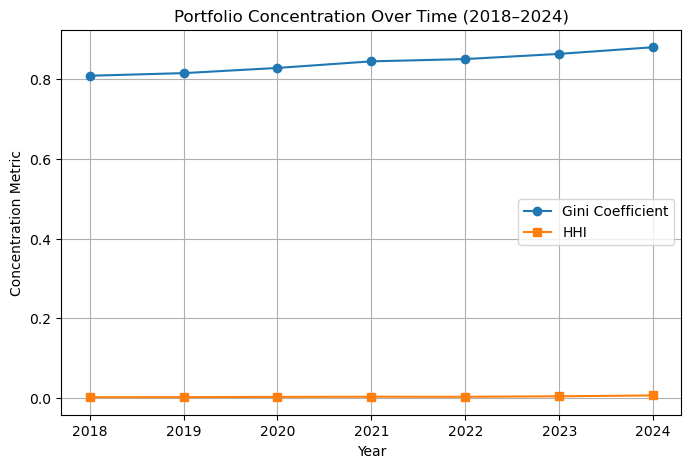

In [ ]:
# Functions to calculate Gini and HHI (assume already defined)
def gini(x):
    x = np.sort(x)
    n = len(x)
    return (2*np.sum((np.arange(1, n+1))*x)) / (n*np.sum(x)) - (n+1)/n

def hhi(x):
    return np.sum(x**2)

# Lists to store results
gini_list = []
hhi_list = []
years = []

#  Calculate metrics for 2018–2023 from the dictionary
for year, df in funds.items():
    weights = df['Portfolio_Weight'].values / 100
    gini_list.append(gini(weights))
    hhi_list.append(hhi(weights))
    years.append(year)

#  Add 2024 manually without recalculating anything
weights_2024 = fund_2024['Portfolio_Weight'].values / 100
gini_list.append(gini(weights_2024))
hhi_list.append(hhi(weights_2024))
years.append(2024)

# Sort by year for proper plotting
years, gini_list, hhi_list = zip(*sorted(zip(years, gini_list, hhi_list)))

# 3️ Plot concentration over time
plt.figure(figsize=(8,5))
plt.plot(years, gini_list, marker='o', label='Gini Coefficient')
plt.plot(years, hhi_list, marker='s', label='HHI')
plt.xlabel('Year')
plt.ylabel('Concentration Metric')
plt.title('Portfolio Concentration Over Time (2018–2024)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Creating a DataFrame with the concentration metrics
concentration_df = pd.DataFrame({
    'Year': years,
    'Gini_Coefficient': gini_list,
    'HHI': hhi_list
})

# Displing the table
print(concentration_df)

   Year  Gini_Coefficient       HHI
0  2019          0.815101  0.002060
1  2020          0.828147  0.002681
2  2021          0.844676  0.003082
3  2022          0.850359  0.002926
4  2023          0.863412  0.004206
5  2024          0.880111  0.006329


**Insights about the Yearly Portfolio Concentration Analysis (2019–2024)**

The graph and the table above show the evolution of portfolio concentration measured by the **Gini Coefficient** and **HHI** from 2019 to 2024. 

- Both metrics indicate a **gradual increase in concentration** over the period.  
- The **Gini Coefficient** rises from ~0.82 in 2019 to ~0.88 in 2024, suggesting that the distribution of portfolio weights is becoming more unequal, with larger positions representing a higher share of the portfolio.  
- Similarly, the **HHI** increases from ~0.0021 to ~0.0063, reflecting that a few holdings are progressively dominating the portfolio.  
- Overall, the trend shows a steady concentration of capital in fewer assets, which could imply higher exposure to individual positions but also highlights the importance of monitoring these top holdings.  
- This gradual increase in concentration suggests that the fund may be focusing more on its largest or highest-conviction positions over time.  
- Investors or analysts should monitor these top holdings carefully, as they have an increasing impact on overall portfolio risk and performance.

This analysis complements visual inspection and provides a quantitative basis to track portfolio concentration over time.


# Fifth objective: Ownership–Voting Discrepancies Analysis
**Concept and Relevance**

Ownership represents the percentage of a company’s equity held by the fund, while Voting indicates the percentage of voting rights the fund can exercise in corporate decisions.
In many cases, Ownership and Voting are equal, but discrepancies can occur due to multi-class share structures or other corporate governance arrangements.

Analyzing these discrepancies is interesting because it reveals how much influence the fund actually has relative to its financial stake.
For example, a fund may hold a large portion of a company’s equity but have limited voting rights, which affects its ability to influence corporate decisions. Conversely, having greater voting rights than ownership can signal strategic control mechanisms.
This analysis helps investors and analysts understand the governance impact of the fund’s holdings beyond just portfolio value.

In [177]:
owned_vs_vote = fund_2024['Ownership'] != fund_2024['Voting']
owned_vs_vote

0       False
1       False
2       False
3       False
4       False
        ...  
8654     True
8655    False
8656    False
8657    False
8658    False
Length: 8645, dtype: bool

In [178]:
owned_vs_vote = fund_2024['Ownership'] != fund_2024['Voting']
num_differ = owned_vs_vote.sum()
print(f"Number of holdings where Ownership differs from Voting: {num_differ}")
print(f"Percentage of holdings with discrepancies between Ownership and Voting: {(num_differ / len(fund_2024)) * 100:.2f}%")

Number of holdings where Ownership differs from Voting: 874
Percentage of holdings with discrepancies between Ownership and Voting: 10.11%


In [179]:
#Create a dataframe with only the rows where Ownership differs from Voting for further analysis
diff_vote_owned = fund_2024[owned_vs_vote]
diff_vote_owned

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
16,Basic Materials,Europe,France,Air Liquide SA,1968399507,1.550000,2.09,1.530824e-01
49,Basic Materials,Europe,France,Arkema SA,213936929,2.950000,3.69,1.663787e-02
71,Basic Materials,Europe,Sweden,Beijer Alma AB,4091949,0.230000,0.46,3.182308e-04
82,Basic Materials,Latin America,Brazil,Braskem SA,44722236,1.059142,2.99,3.478048e-03
85,Basic Materials,Asia,Indonesia,Bumi Resources Minerals Tbk PT,112547,1.059142,0.00,8.752779e-06
...,...,...,...,...,...,...,...,...
8539,Utilities,Latin America,Brazil,Light S/A,394,1.059142,0.00,3.064138e-08
8586,Utilities,Asia,Hong Kong,Realord Group Holdings Ltd,953,1.059142,0.00,7.411480e-08
8589,Utilities,Asia,India,ReNew Energy Global PLC,4107466,0.250000,0.17,3.194376e-04
8642,Utilities,Europe,Germany,Uniper SE,334255,1.059142,0.00,2.599501e-05


In [180]:
#Checking if the difference tends to be more voting higher than ownership or viceversa
# Create boolean masks for direction of discrepancy
voting_higher = diff_vote_owned['Voting'] > diff_vote_owned['Ownership']
ownership_higher = diff_vote_owned['Ownership'] > diff_vote_owned['Voting']

In [181]:
# Add a new column to diff_vote_owned to indicate which is higher
diff_vote_owned['Discrepancy_Type'] = ['Voting > Ownership' if v else 'Ownership > Voting' 
                                       for v in voting_higher]

Discrepancy_Type
Ownership > Voting    483
Voting > Ownership    391
Name: count, dtype: int64


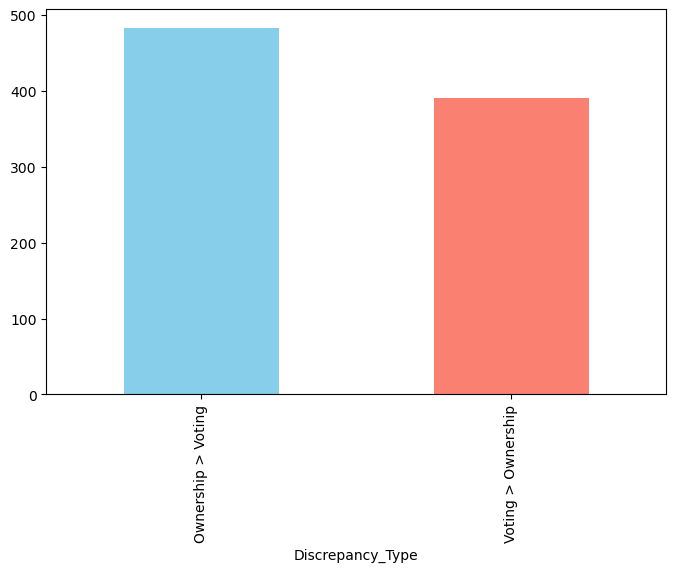

In [185]:
print(diff_vote_owned['Discrepancy_Type'].value_counts())
diff_vote_owned['Discrepancy_Type'].value_counts().plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.show()

In [75]:
diff_vote_owned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight,Discrepancy_Type
35,Basic Materials,Europe,United Kingdom,Anglo American PLC,892419207,1.040469,2.57,0.064299,Ownership > Voting
45,Basic Materials,Europe,France,Arkema SA,172774835,2.470000,3.09,0.012448,Ownership > Voting


## Industry Breakdown of Ownership–Voting Discrepancies

In [76]:
# Taking a look at the industries with most discrepancies
diff_vote_owned['Industry'].value_counts()

Industry
Consumer Discretionary    195
Industrials               157
Technology                123
Financials                102
Health Care                93
Real Estate                61
Basic Materials            48
Consumer Staples           45
Utilities                  32
Telecommunications         28
Energy                     17
Name: count, dtype: int64

In [ ]:
count = diff_vote_owned['Industry'].value_counts()
pct = (count / count.sum()) * 100
pct

Industry
Consumer Discretionary    21.642619
Industrials               17.425083
Technology                13.651498
Financials                11.320755
Health Care               10.321865
Real Estate                6.770255
Basic Materials            5.327414
Consumer Staples           4.994451
Utilities                  3.551609
Telecommunications         3.107658
Energy                     1.886792
Name: count, dtype: float64

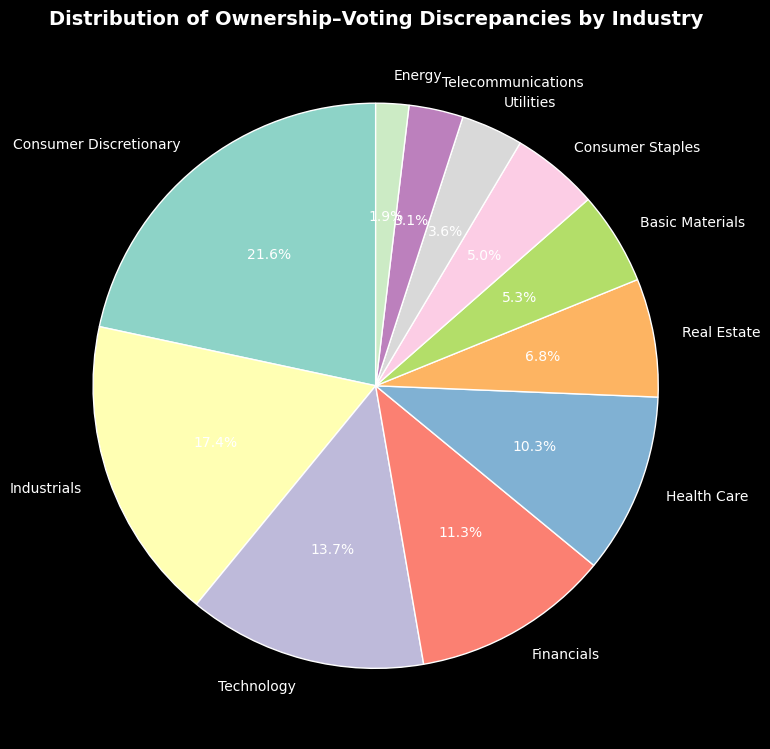

In [78]:
# Visualizing the distribution of discrepancies by industry

plt.figure(figsize=(8, 8))
plt.pie(
    pct,
    labels=pct.index,
    autopct='%1.1f%%',  
    startangle=90,       # starts from the top
    colors=plt.cm.Set3.colors,  
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Distribution of Ownership–Voting Discrepancies by Industry', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

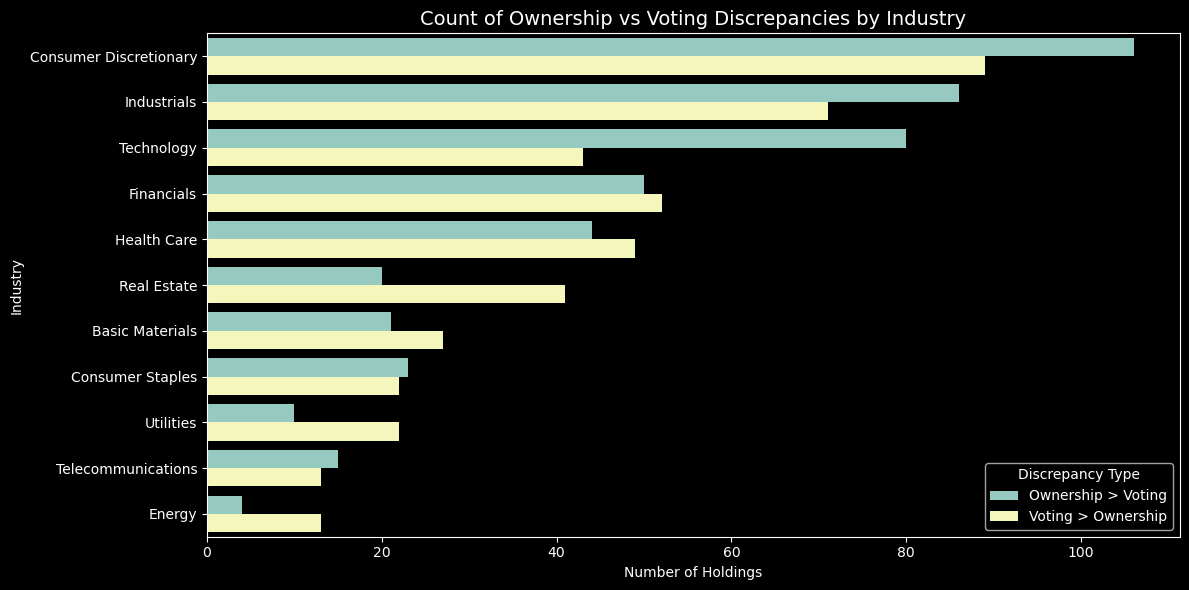

In [79]:
#  Count plot by Industry

plt.figure(figsize=(12,6))
sns.countplot(data=diff_vote_owned, y='Industry', hue='Discrepancy_Type', order=diff_vote_owned['Industry'].value_counts().index)
plt.title('Count of Ownership vs Voting Discrepancies by Industry', fontsize=14)
plt.xlabel('Number of Holdings')
plt.ylabel('Industry')
plt.legend(title='Discrepancy Type')
plt.tight_layout()
plt.show()

**Comment on Industry Breakdown of Ownership–Voting Discrepancies**

The majority of discrepancies between Ownership and Voting rights are concentrated in a few sectors.
Consumer Discretionary (~21.6%), Industrials (~17.4%), and Technology (~13.6%) together account for over half of all cases.

This pattern suggests that in sectors like Consumer Discretionary, Industrials, and Technology, companies often have more complex ownership arrangements. It could be that some holdings are structured in a way that the fund owns shares but doesn’t always get proportional voting power, or vice versa, hinting at strategic governance setups rather than just portfolio size.

## Country Breakdown of Ownership–Voting Discrepancies

In [80]:
count = diff_vote_owned['Country'].value_counts()
pct = (count / count.sum()) * 100
pct

Country
United States           27.857936
China                   13.651498
France                  10.099889
Sweden                   8.990011
Taiwan                   4.661487
Italy                    4.550499
South Korea              3.440622
Canada                   2.885683
Japan                    2.330744
Brazil                   2.219756
Poland                   2.108768
Hong Kong                2.108768
Germany                  1.442841
Denmark                  1.331853
India                    1.220866
Mexico                   0.998890
Russia                   0.998890
Thailand                 0.998890
Australia                0.998890
United Kingdom           0.887902
Finland                  0.887902
Belgium                  0.776915
Malaysia                 0.554939
South Africa             0.554939
Switzerland              0.554939
Indonesia                0.332963
Spain                    0.332963
Sri Lanka                0.332963
New Zealand              0.221976
Colomb

In [ ]:
count=fund_2024.groupby('Country')['Market_Value_USD'].sum()
country_market_value_percentage = (count / count.sum()) * 100
country_market_value_percentage.sort_values(ascending=False).head(17)

Country
United States     54.714662
Japan              6.328589
United Kingdom     5.091178
Germany            3.542248
China              3.508865
Switzerland        3.081551
France             3.038944
Taiwan             2.362666
India              2.333999
Canada             2.185300
Netherlands        1.794137
Australia          1.599517
South Korea        1.376367
Sweden             1.147122
Spain              1.050234
Italy              1.024560
Denmark            0.887597
Name: Market_Value_USD, dtype: float64

## Comment 
Although most discrepancies occur in U.S. holdings (~27.9%), other countries with high proportions include China (~13.7%) and France (~10.1%).  
This indicates that discrepancies are more driven by corporate ownership structures than by the size of the investment in each country, **highlighting that governance nuances, rather than portfolio allocation, explain these differences**.


## Discrepancies among the top portfolio weight holdings

In [187]:
#Top 15 discrepancies by Portfolio Weight
diff_vote_owned.sort_values(by='Portfolio_Weight', ascending=False).head(30)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight,Discrepancy_Type
7160,Technology,North America,United States,Alphabet Inc,29271691564,0.880000,1.26,2.276459,Ownership > Voting
7715,Technology,North America,United States,Meta Platforms Inc,19750530468,0.600000,1.34,1.535999,Ownership > Voting
3067,Financials,North America,United States,Berkshire Hathaway Inc,9483089298,1.490000,0.49,0.737500,Voting > Ownership
4463,Health Care,Europe,Denmark,Novo Nordisk A/S,6782991606,0.310000,1.75,0.527513,Ownership > Voting
5720,Industrials,North America,United States,Mastercard Inc,5951922338,1.240000,1.23,0.462881,Voting > Ownership
4572,Health Care,Europe,Switzerland,Roche Holding AG,5272273510,0.060000,2.31,0.410025,Ownership > Voting
6389,Industrials,North America,United States,Visa Inc,5122782747,0.940000,0.87,0.398399,Voting > Ownership
8314,Telecommunications,Asia,South Korea,Samsung Electronics Co Ltd,3887080727,1.610000,1.84,0.302298,Ownership > Voting
6649,Real Estate,North America,United States,Digital Realty Trust Inc,3853765706,6.550000,6.42,0.299707,Voting > Ownership
8219,Telecommunications,North America,United States,Comcast Corp,3805431774,1.760000,2.65,0.295948,Ownership > Voting


In [191]:
p_80_weight = fund_2024['Portfolio_Weight'].quantile(0.8)
p_80_weight_df = fund_2024[fund_2024['Portfolio_Weight'] >= p_80_weight]
p_80_weight_df.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
13,Basic Materials,North America,Canada,Agnico Eagle Mines Ltd,606723832,1.55,1.55,0.047185
16,Basic Materials,Europe,France,Air Liquide SA,1968399507,1.55,2.09,0.153082


In [192]:
p_80_weight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1729 entries, 13 to 8651
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          1729 non-null   object 
 1   Region            1729 non-null   object 
 2   Country           1729 non-null   object 
 3   Name              1729 non-null   object 
 4   Market_Value_USD  1729 non-null   int64  
 5   Voting            1729 non-null   float64
 6   Ownership         1729 non-null   float64
 7   Portfolio_Weight  1729 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 121.6+ KB


In [193]:
# Filter the rows in p_80_weight_df that are also in diff_vote_owned
high_weight_discrepancies = p_80_weight_df[p_80_weight_df['Name'].isin(diff_vote_owned['Name'])]

# Calculate the percentage over the total of the top 20% by portfolio weight
percentage = (len(high_weight_discrepancies) / len(p_80_weight_df)) * 100
print(f"Percentage of holdings in the top 20% by weight with Ownership-Voting discrepancies: {percentage:.2f}%")



Percentage of holdings in the top 20% by weight with Ownership-Voting discrepancies: 12.32%


## Comment on High-Portfolio-Weight Holdings with Ownership–Voting Discrepancies

Among the top 20% of holdings by portfolio weight, only about 12.3% exhibit discrepancies between Ownership and Voting.  
This suggests that for the fund’s largest investments, voting power is generally proportional to ownership, indicating that **most high-weight positions do not face governance constraints related to share structures**.  
The few discrepancies that do exist in this top tier may point to strategic arrangements or multi-class share structures in selected companies, but they are relatively rare compared to the overall top holdings.

